# Customer Segmentation


# dataset columns

InvoiceNo:

Type: Categorical/Alphanumeric.
Description: This is a unique identifier for each transaction. It could represent a single invoice or an order. This column helps in tracking each individual purchase.
Values: It can be alphanumeric, as some invoices might have letters or special characters.

StockCode:

Type: Categorical.
Description: This is the unique identifier for the product purchased in a transaction. Each product has a distinct stock code, which helps in inventory management and product analysis.
Values: Alphanumeric codes representing different products.

Description:

Type: Text.
Description: This provides a short description of the product purchased. It can give additional details like the name or features of the product.
Values: Text descriptions of the products (e.g., "red sweater", "candle holder").

Quantity:

Type: Numeric.
Description: This indicates the quantity of the product that was purchased in the transaction. It is an important metric for sales analysis.
Values: Numeric values, where positive numbers represent products purchased, and negative values may indicate returns or cancellations.
InvoiceDate:


Type: Date/Time.

Description: The date and time when the transaction occurred. This column is crucial for time-based analysis, such as sales trends, seasonality, or customer purchase behavior.
Values: Date and time values, typically in a format like "YYYY-MM-DD HH:MM:SS".

UnitPrice:

Type: Numeric (Continuous).
Description: The price of a single unit of the product at the time of purchase. It helps in calculating the 
total sale amount per product.
Values: Numeric values representing the price of individual items (e.g., 3.50, 12.99). The prices may vary based on the product.

CustomerID:

Type: Categorical/Alphanumeric.
Description: This is a unique identifier for the customer making the purchase. It is used to track individual customers and analyze their purchase behavior.
Values: Alphanumeric codes or numbers representing each customer.

Country:

Type: Categorical (Geographic).
Description: The country where the transaction took place. This information is useful for regional analysis and segmentation based on geography.
Values: Country names (e.g., "United Kingdom", "Germany", "France").

In this project, the goal is to identify key customer segments within a transnational dataset, which includes all transactions made between 01/12/2010 and 09/12/2011 for a UK-based online retail company. This company primarily sells unique, all-occasion gifts, and many of its customers are wholesalers.









In [1]:
# loading neccesary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data=pd.read_excel('Online Retail.xlsx')

# Get summary of data

In [3]:
# check shape
data.shape

(541909, 8)

In [6]:
# display first values
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
# last values
data.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [9]:
# get colum name
print("Features of the dataset:")
data.columns


Features of the dataset:


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
# check type of dataset
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
#check details about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [16]:
# check the description of data
data.describe().T

count                           mean                  min  \
Quantity     541909.0                        9.55225             -80995.0   
InvoiceDate    541909  2011-07-04 13:34:57.156386048  2010-12-01 08:26:00   
UnitPrice    541909.0                       4.611114            -11062.06   
CustomerID   406829.0                    15287.69057              12346.0   

                             25%                  50%                  75%  \
Quantity                     1.0                  3.0                 10.0   
InvoiceDate  2011-03-28 11:34:00  2011-07-19 17:17:00  2011-10-19 11:27:00   
UnitPrice                   1.25                 2.08                 4.13   
CustomerID               13953.0              15152.0              16791.0   

                             max          std  
Quantity                 80995.0   218.081158  
InvoiceDate  2011-12-09 12:50:00          NaN  
UnitPrice                38970.0    96.759853  
CustomerID               18287.0  1713.600303

In [5]:
# check unique value of each columns
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

# Preprocessing the dataset

Preprocessing of a dataset refers to the steps taken to clean and prepare the data for analysis or modeling. It is a critical part of the data science workflow because raw data is often incomplete, inconsistent, or not in the right format for machine learning algorithms to perform well. The goal of preprocessing is to improve the quality of the data and make it more suitable for analysis. Here are common steps involved in data preprocessing:

In [6]:
# check null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

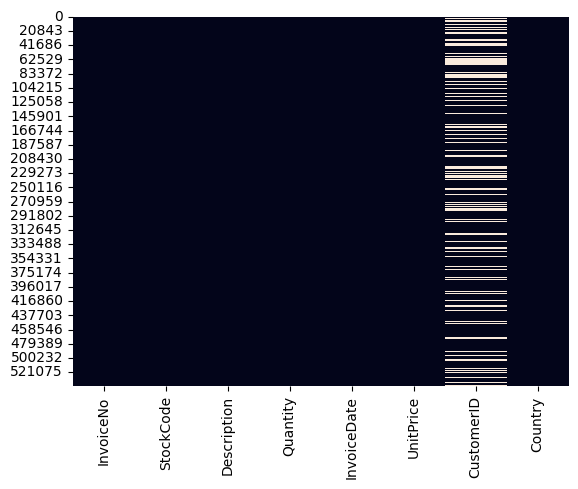

In [19]:
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

 Here we can see dataset specific colums contain null values.. so we need to handle it.as dataset contain 
 large number of record we can drop these values .that will not effect algorathm perfomance

In [7]:
# drop null values
data.dropna(inplace=True)


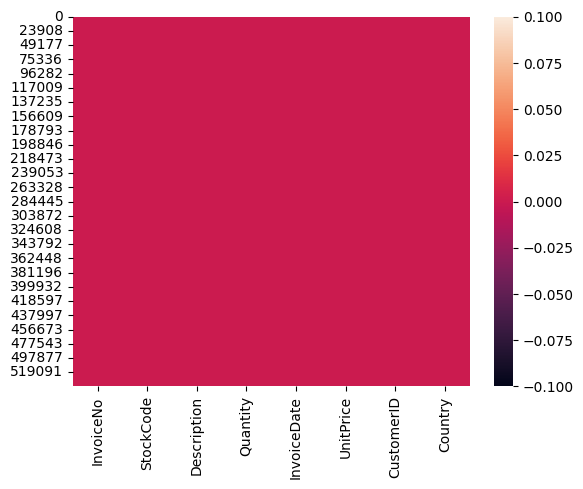

In [8]:
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull())
plt.show()


In [9]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

The null values get removed

checking duplicate values

Why is it important to remove duplicate records from my data?

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [10]:
# Checking Duplicate Values
data[data.duplicated()]


InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527    2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555    2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[5225 rows x 8 columns]

In [11]:
data=data.drop_duplicates()

In [12]:
data.shape

(401604, 8)

 in our dataset invoivceNo starting with c it means cancelled ones so we can drop these rows

In [17]:
# checking invoice no.
data[data['InvoiceNo'].str.contains('C', na=False)]


InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [20]:
# droping false transactions
df = data[~data['InvoiceNo'].str.contains('C', na=False)]


In [23]:
df.shape    

(392732, 8)

Try to to convert invoice date into year,month,day,hour like way

In [24]:
df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day
df['InvoiceDate_hour'] = df['InvoiceDate'].dt.hour
df['InvoiceDate_minute'] = df['InvoiceDate'].dt.minute
df['InvoiceDate_second'] = df['InvoiceDate'].dt.second

In [25]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

        InvoiceDate_year  InvoiceDate_month  InvoiceDate_day  \
0                   2010                 12                1   
1                   2010                 12                1   
2                   2010                 12                1   
3                   2010                 12                1   
4                   2010                 12                1   
...                  ...                ...              ...   
541904              2011                 12                9   
541905              2011                 12                9   
541906              2011                 12                9   
541907              2011                 12                9   
541908              2011                 12                9   

        InvoiceDate_hour  InvoiceDate_minute  InvoiceDate_second  
0                      8                  26                   0  
1                      8                  26                   0  
2                      8                  26                   0  
3                      8                  26                   0  
4                      8                  26                   0  
...                  ...                 ...                 ...  
541904                12                  50                   0  
541905                12                  50                   0  
541906                12                  50                   0  
541907                12                  50                   0  
541908                12                  50                   0  

[392732 rows x 14 columns]

In [26]:
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


dtype
InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
InvoiceDate_year             int32
InvoiceDate_month            int32
InvoiceDate_day              int32
InvoiceDate_hour             int32
InvoiceDate_minute           int32
InvoiceDate_second           int32

EDA

An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.


take colums to analyse the datas et

In [27]:
# let us see the unique ids of customers
print('The no. of customers = ',df['CustomerID'].nunique())

The no. of customers =  4339


Now we cn see which customer is more active

In [29]:
df['CustomerID'].value_counts(ascending=False)

CustomerID
17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
           ... 
17747.0       1
16737.0       1
18184.0       1
15313.0       1
13106.0       1
Name: count, Length: 4339, dtype: int64

In [39]:
#finding most active customer
active_customers=pd.DataFrame(df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers

CustomerID  count
0        17841.0   7676
1        14911.0   5672
2        14096.0   5111
3        12748.0   4413
4        14606.0   2677
...          ...    ...
4334     16990.0      1
4335     13302.0      1
4336     13017.0      1
4337     17923.0      1
4338     13106.0      1

[4339 rows x 2 columns]

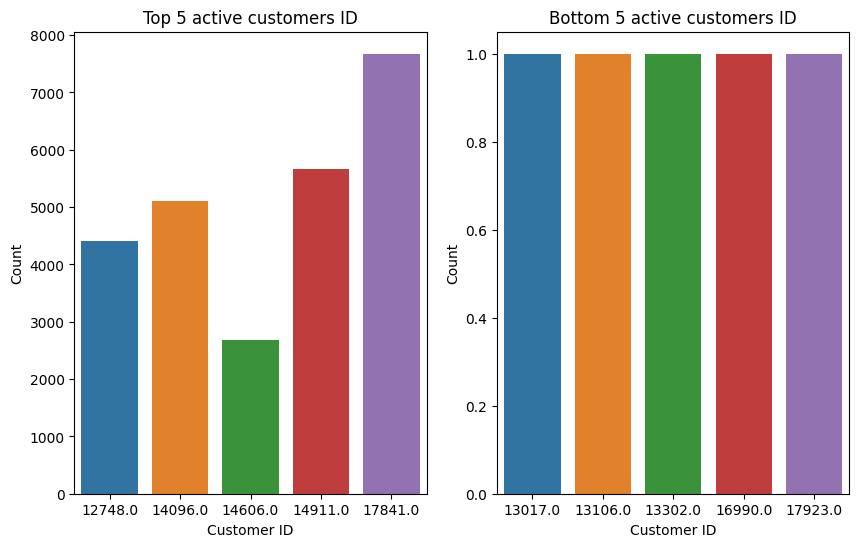

In [46]:
#
# visulizing
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x=active_customers['CustomerID'][:5],y=active_customers['count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.barplot(x=active_customers['CustomerID'][-5:],y=active_customers['count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.show()

From we can which are customers more active with the shope

Analysis of Categorical Features

In [48]:
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [59]:
# check top products (Descripton)
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Product'}, inplace=True)

In [60]:
Description_df.head()

Product  count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390

In [61]:
Description_df.tail()

Product  count
3872         GREEN WITH METAL BAG CHARM      1
3873         WHITE WITH METAL BAG CHARM      1
3874  BLUE/NAT SHELL NECKLACE W PENDANT      1
3875            PINK EASTER HENS+FLOWER      1
3876        PAPER CRAFT , LITTLE BIRDIE      1

<Axes: title={'center': 'Top 5 Product Name'}, xlabel='Product', ylabel='count'>

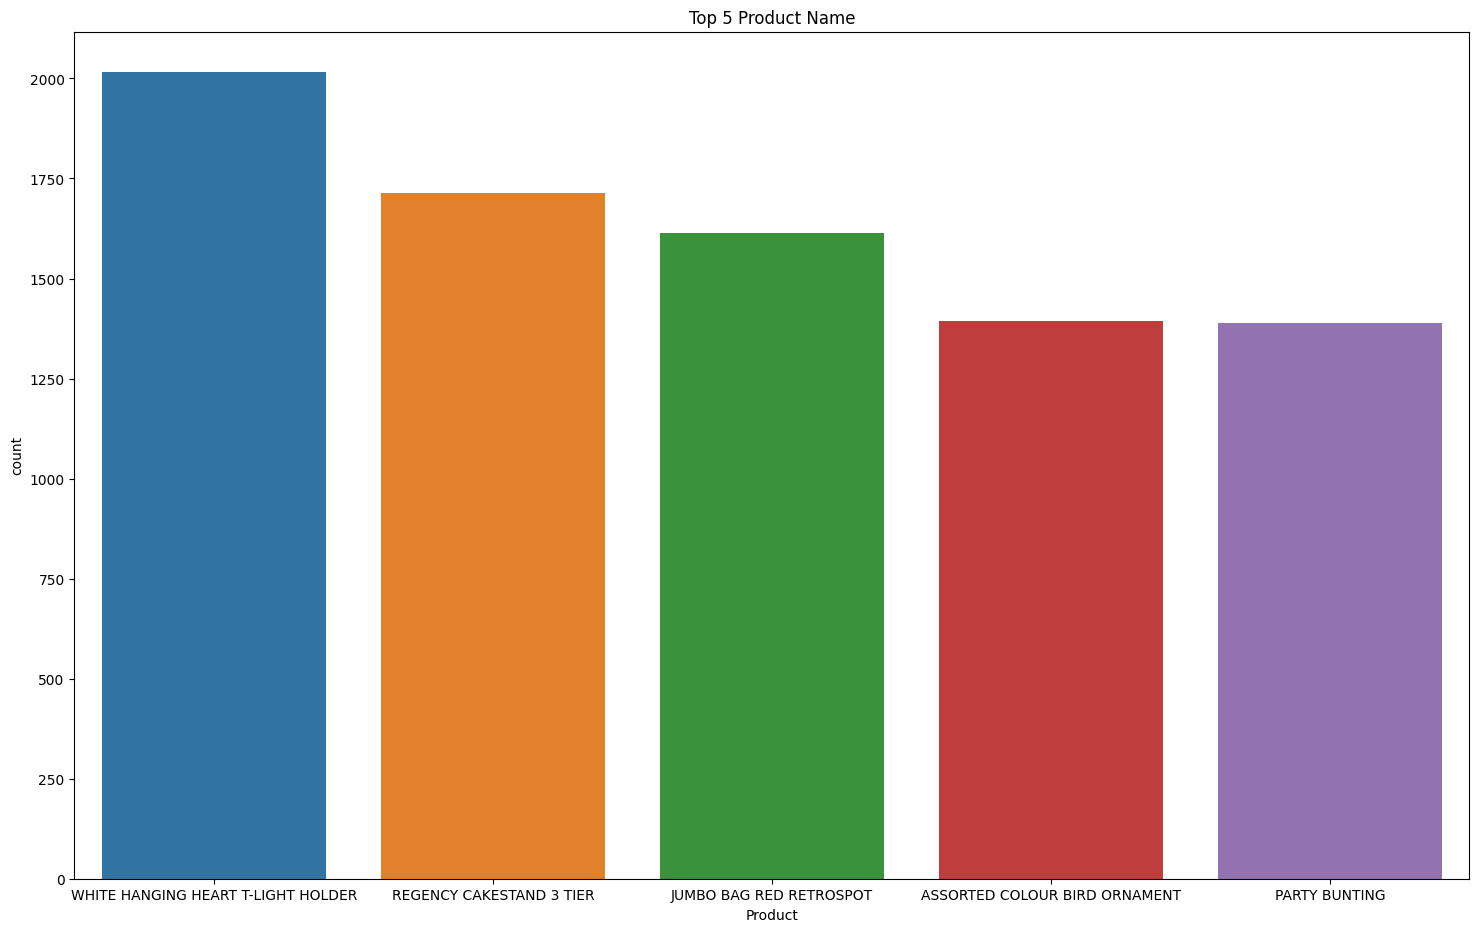

In [63]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Product',y='count',data=Description_df[:5])

In [64]:
# Stockcode
StockCode_df=df['StockCode'].value_counts().reset_index()


In [65]:
StockCode_df.head()

StockCode  count
0    85123A   2023
1     22423   1714
2    85099B   1615
3     84879   1395
4     47566   1390

In [66]:
StockCode_df.tail()

StockCode  count
3660     20678      1
3661    90059D      1
3662     90168      1
3663     90169      1
3664     23843      1

<Axes: title={'center': 'Top 5 Stock Name'}, xlabel='StockCode', ylabel='count'>

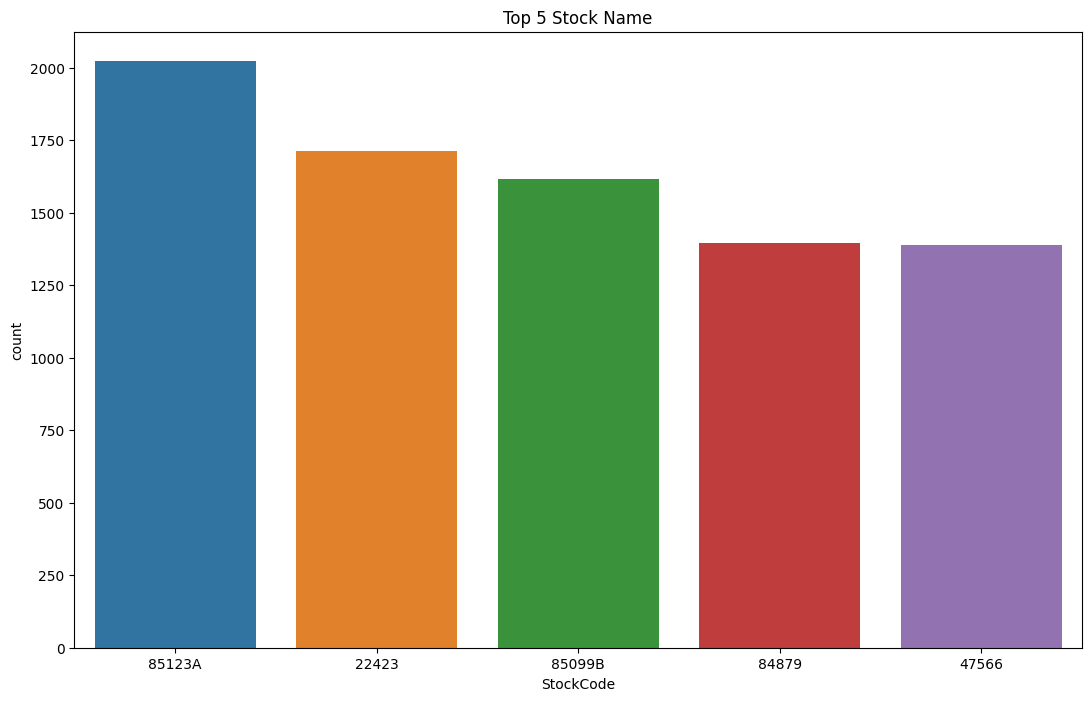

In [68]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode',y='count',data=StockCode_df[:5])

 can see some stock codes are having repeated highest time

In [69]:
# check country variable
country_df=df['Country'].value_counts().reset_index()

In [70]:
country_df.head()

Country   count
0  United Kingdom  349227
1         Germany    9027
2          France    8327
3            EIRE    7228
4           Spain    2480

In [71]:
country_df.tail()

Country  count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

<Axes: title={'center': 'Top 5 Country based on the Most Numbers Customers'}, xlabel='Country', ylabel='count'>

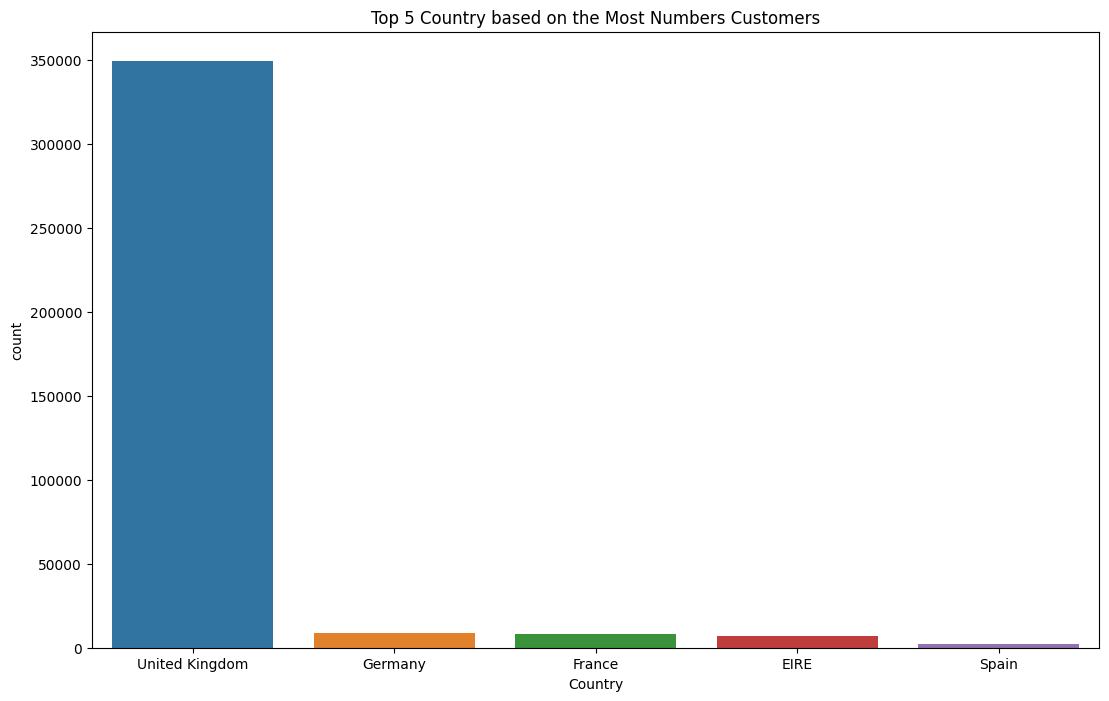

In [73]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country',y='count',data=country_df[:5])

<Axes: title={'center': 'Top 5 Country based least Numbers of  Customers'}, xlabel='Country', ylabel='count'>

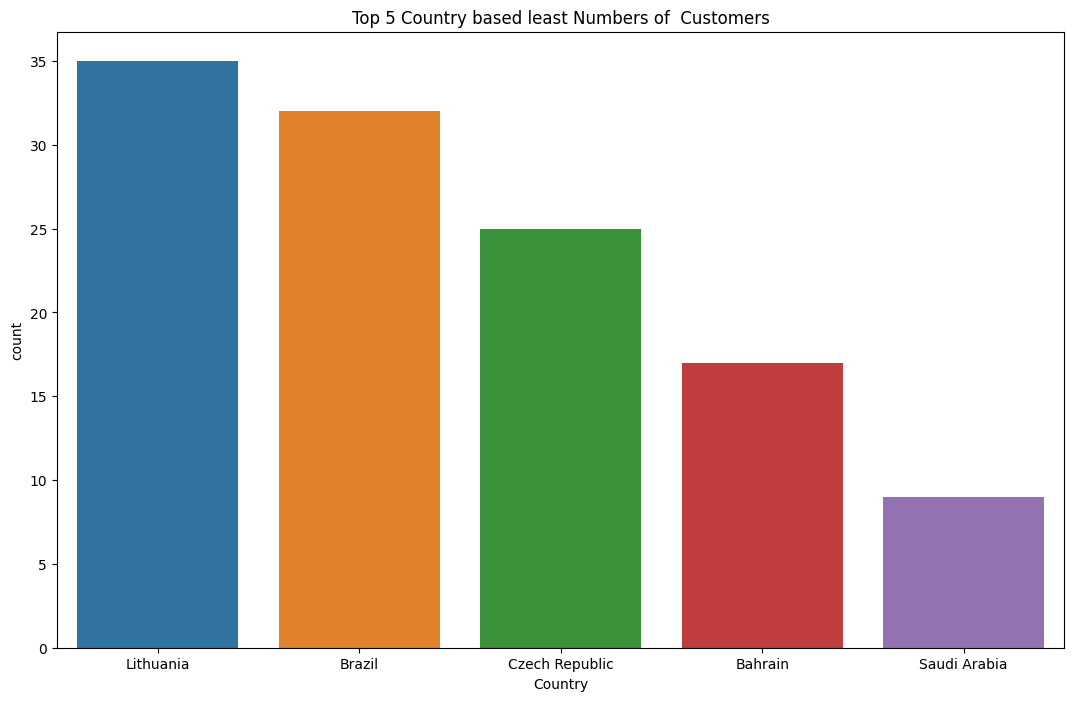

In [77]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country',y='count',data=country_df[-5:])

From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain
From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain  and Saudi Arabia

## **Analysis Numeric Features**

In [82]:
numerical_columns=list(df.select_dtypes(['int64','float64','int32']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features


Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

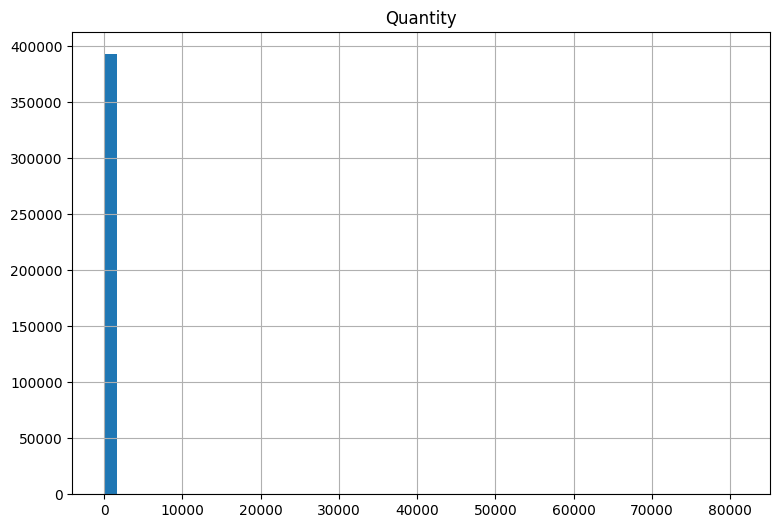

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


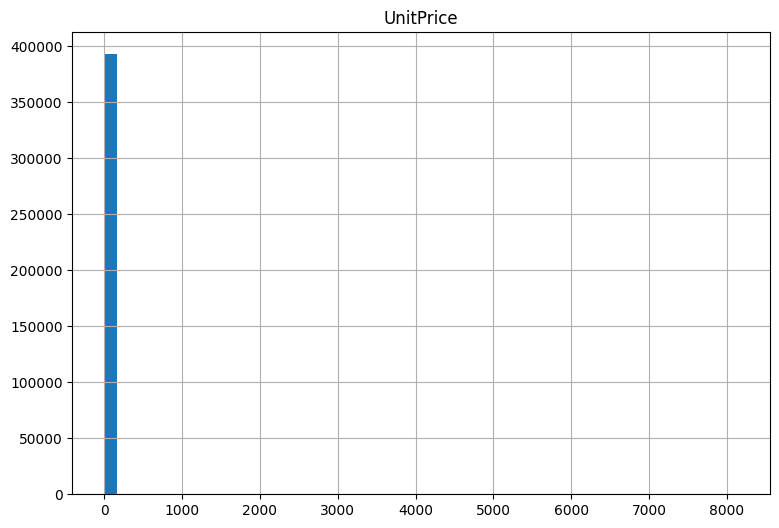

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


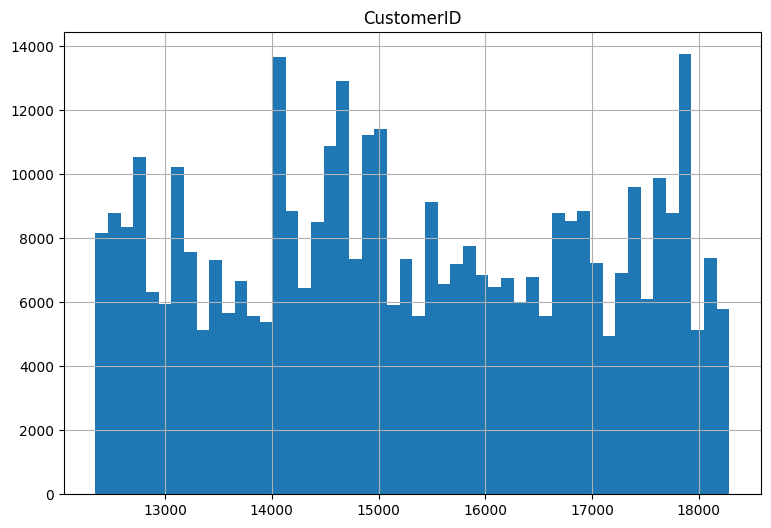

Skewness : 0.0301953601721347
Kurtosis : -1.1807001644923933


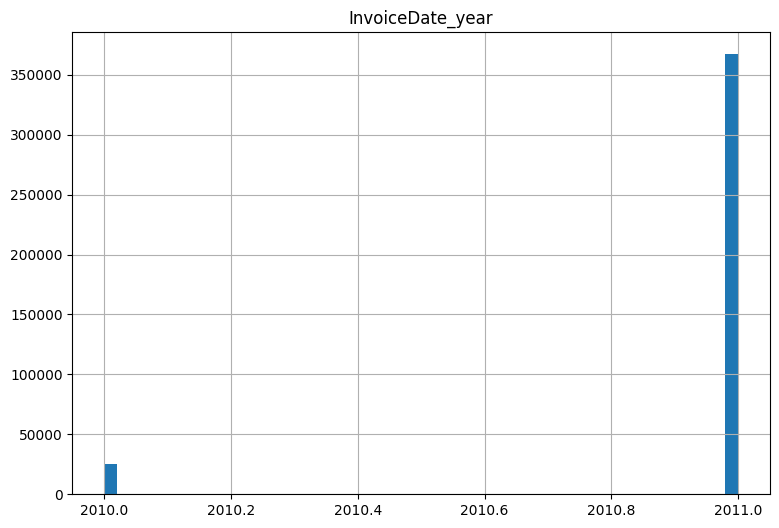

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


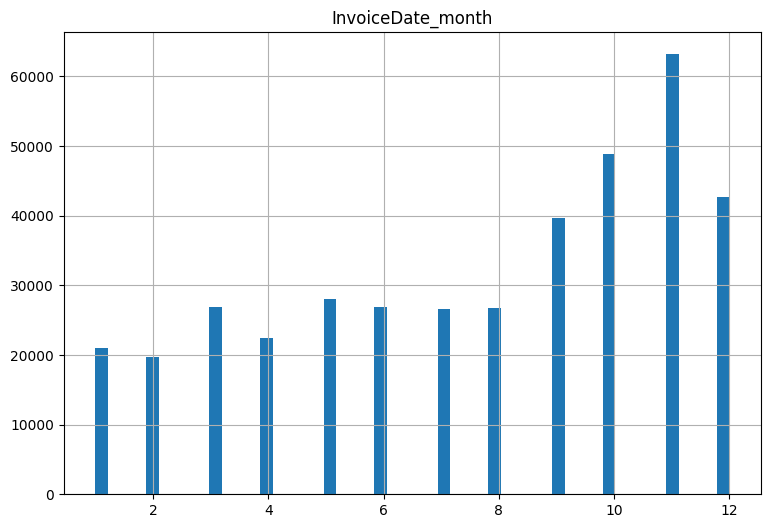

Skewness : -0.44039649840565165
Kurtosis : -1.0764781956797629


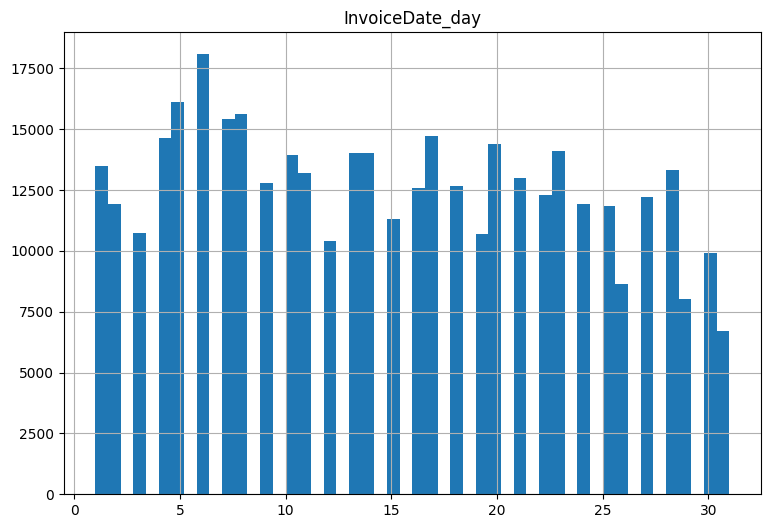

Skewness : 0.11441497180759913
Kurtosis : -1.1716768778411122


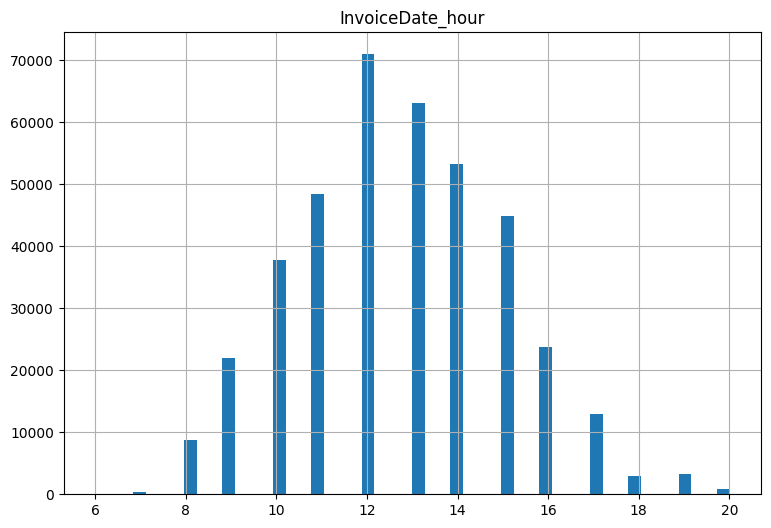

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


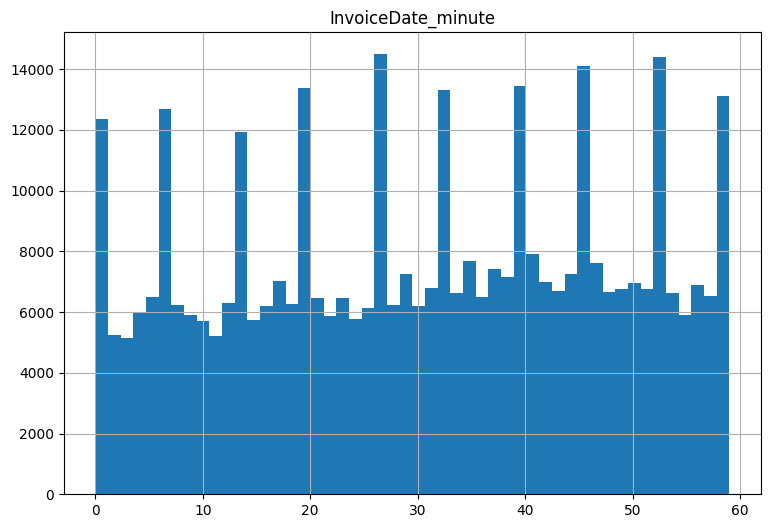

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


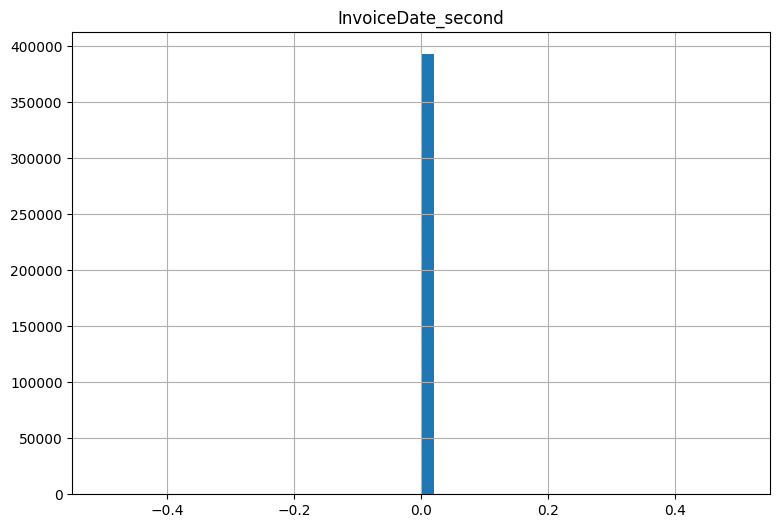

Skewness : 0
Kurtosis : 0


In [84]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  feature.hist(bins=50, ax=ax)
  
  ax.set_title(col)
  plt.show()
  print( "Skewness :",df[col].skew())
  print( "Kurtosis :",df[col].kurt())

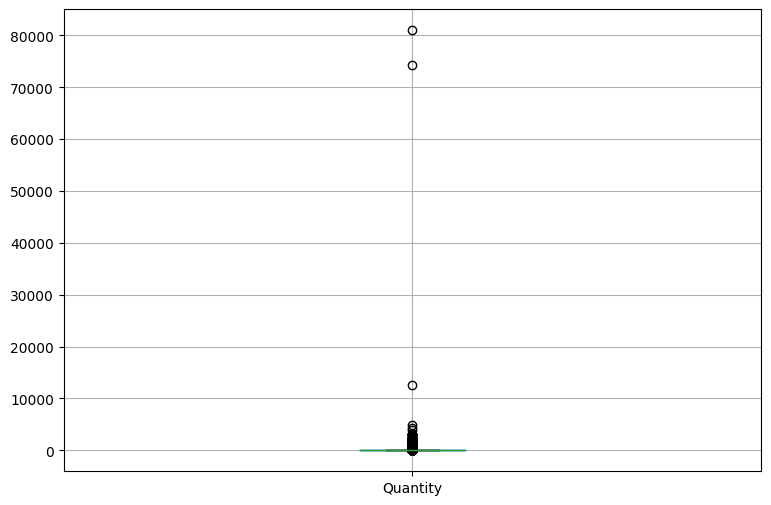

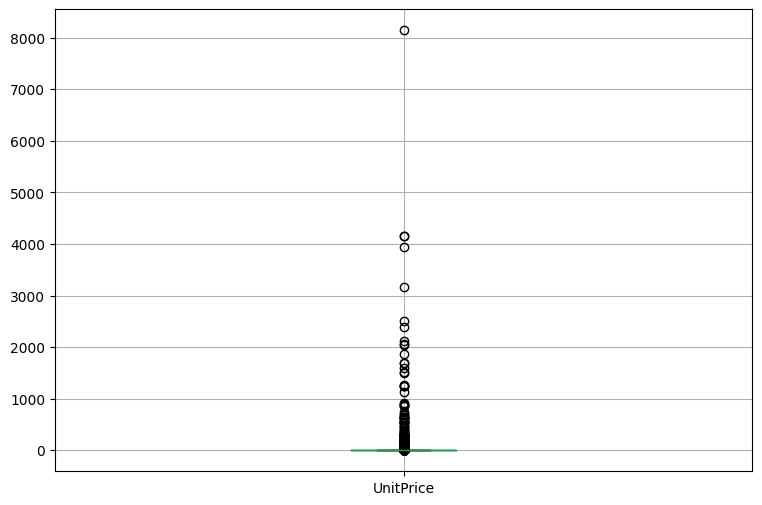

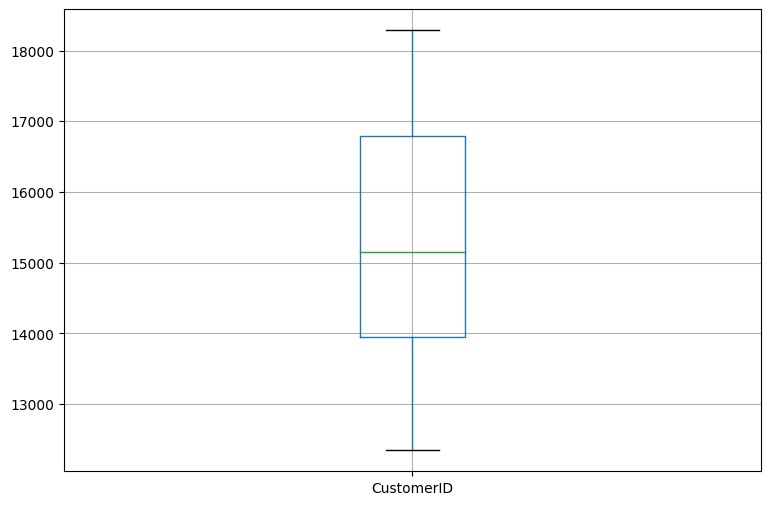

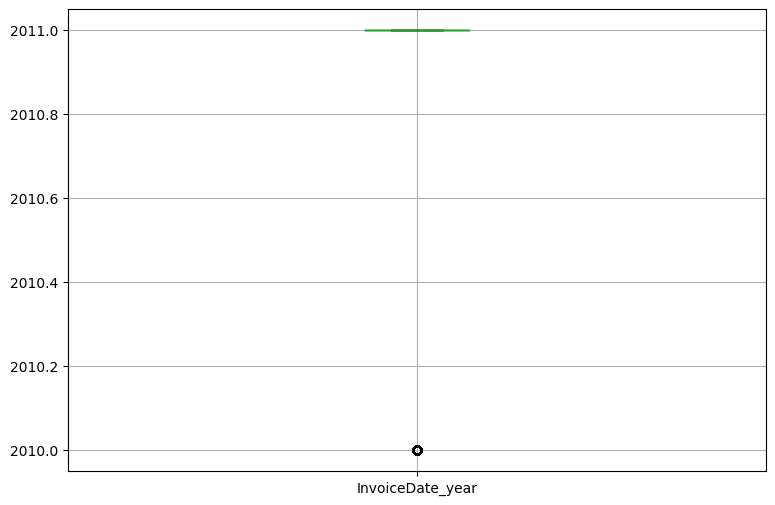

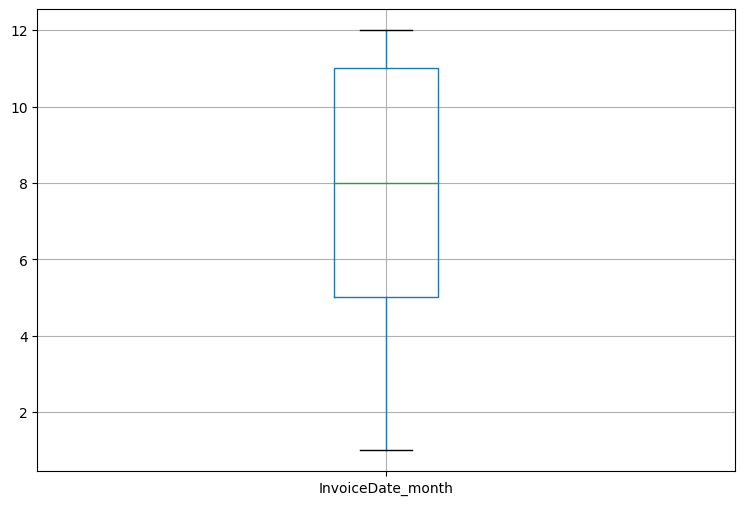

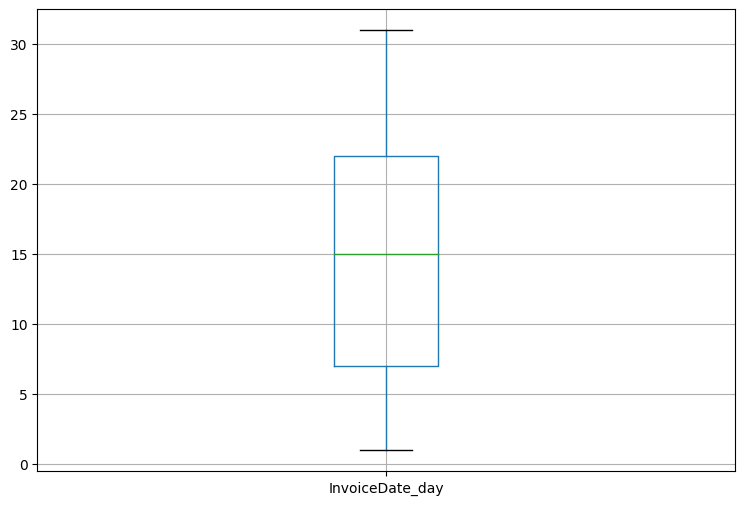

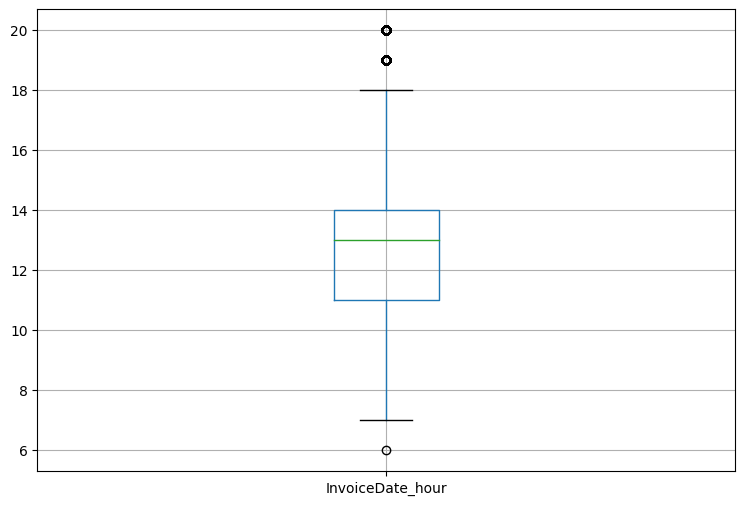

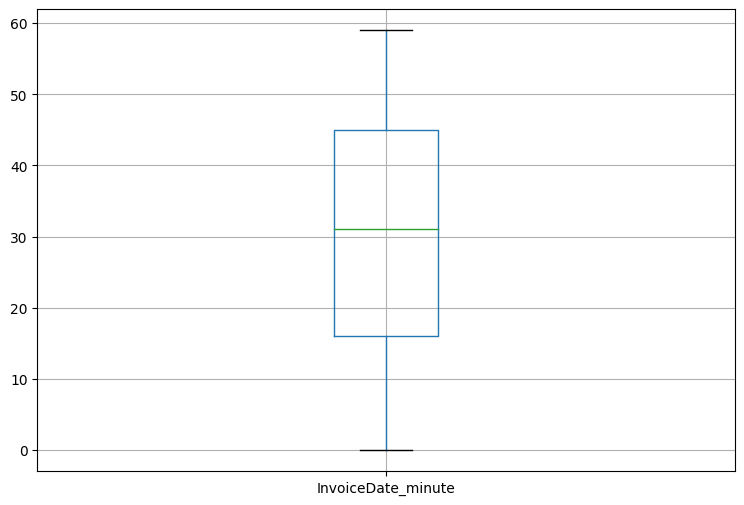

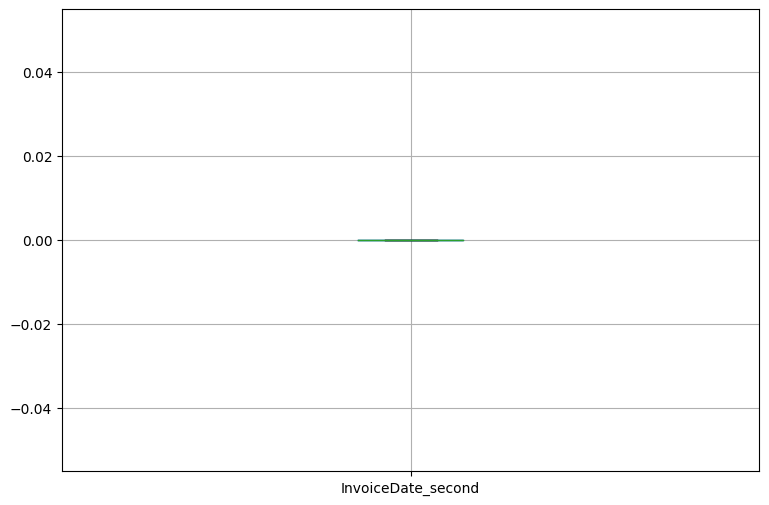

In [85]:
# plot a boxplot for the label by each numerical feature to check outlayes 

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(col)
plt.show()

# Correlation

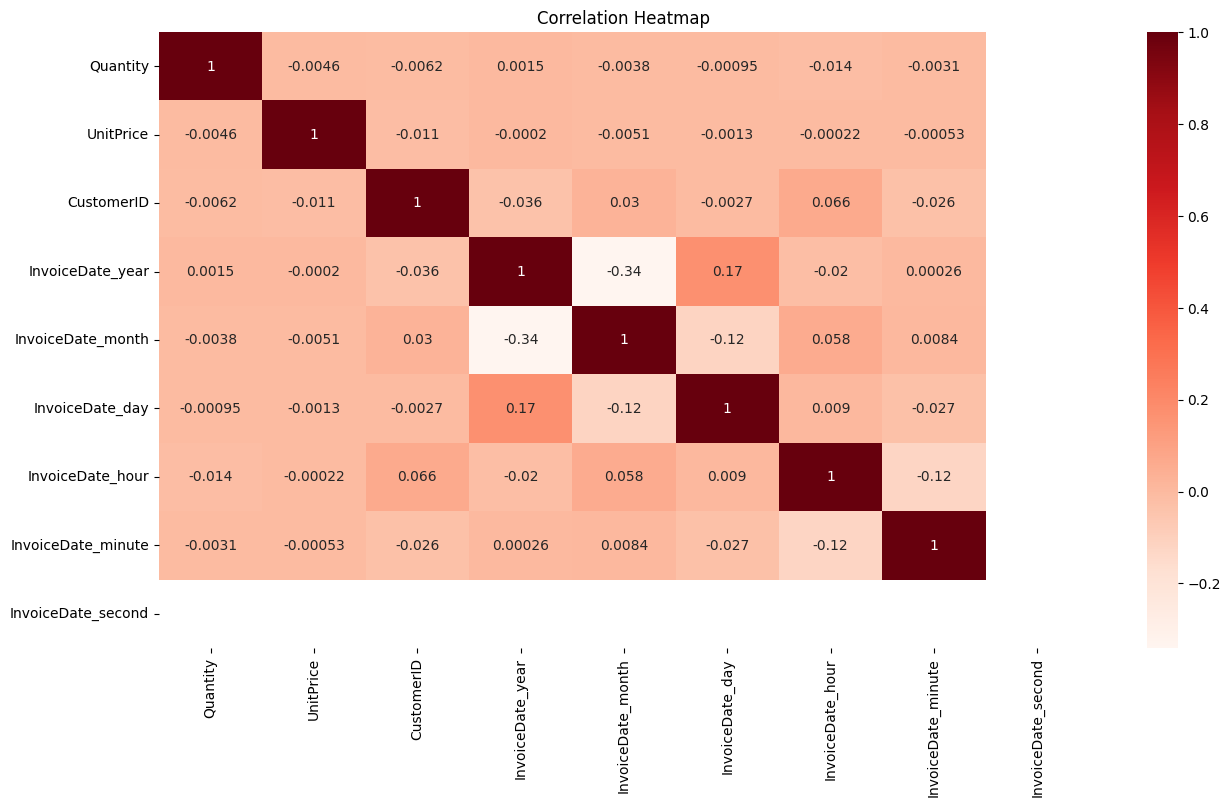

In [91]:
## Correlation
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()


In [92]:
# convert day number to day name
df['Day']=df['InvoiceDate'].dt.day_name()

In [94]:
#create a new features TotalAmount from form product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [95]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceDate_year  InvoiceDate_month  InvoiceDate_day  InvoiceDate_hour  \
0              2010                 12                1                 8   
1              2010                 12                1                 8   
2              2010                 12                1                 8   
3              2010                 12                1                 8   
4              2010                 12                1                 8   

   InvoiceDate_minute  InvoiceDate_second        Day  TotalAmount  
0                  26                   0  Wednesday        15.30  
1                  26                   0  Wednesday        20.34  
2                  26                   0  Wednesday        22.00  
3                  26                   0  Wednesday        20.34  
4                  26                   0  Wednesday        20.34

<Axes: title={'center': 'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

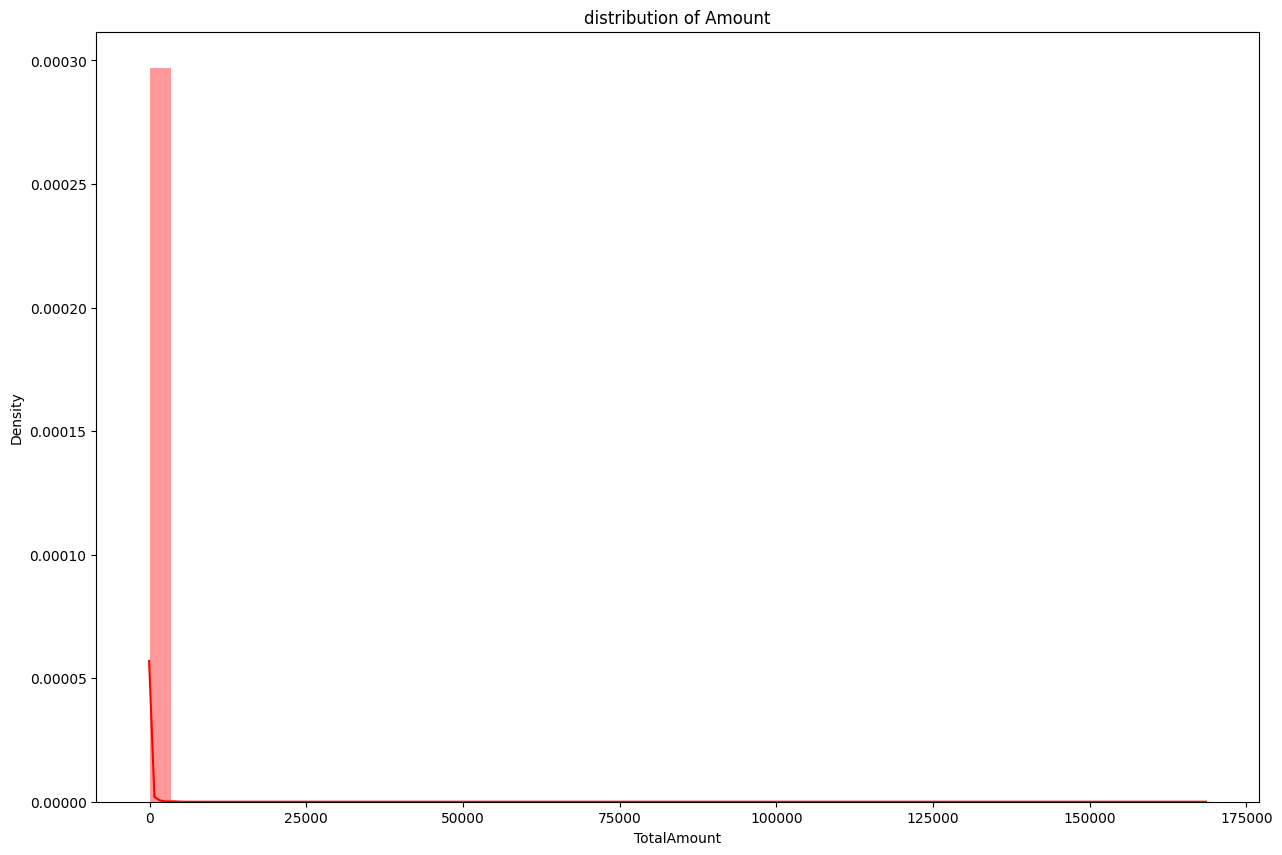

In [98]:
# check distribution of total amount
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="Red")

In [101]:
# check column discription
df['TotalAmount'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

In [103]:
day_df=df['Day'].value_counts().reset_index()
day_df

Day  count
0   Thursday  79260
1  Wednesday  68043
2    Tuesday  65747
3     Monday  64237
4     Sunday  61214
5     Friday  54231

<Axes: title={'center': 'Day'}, xlabel='Day', ylabel='count'>

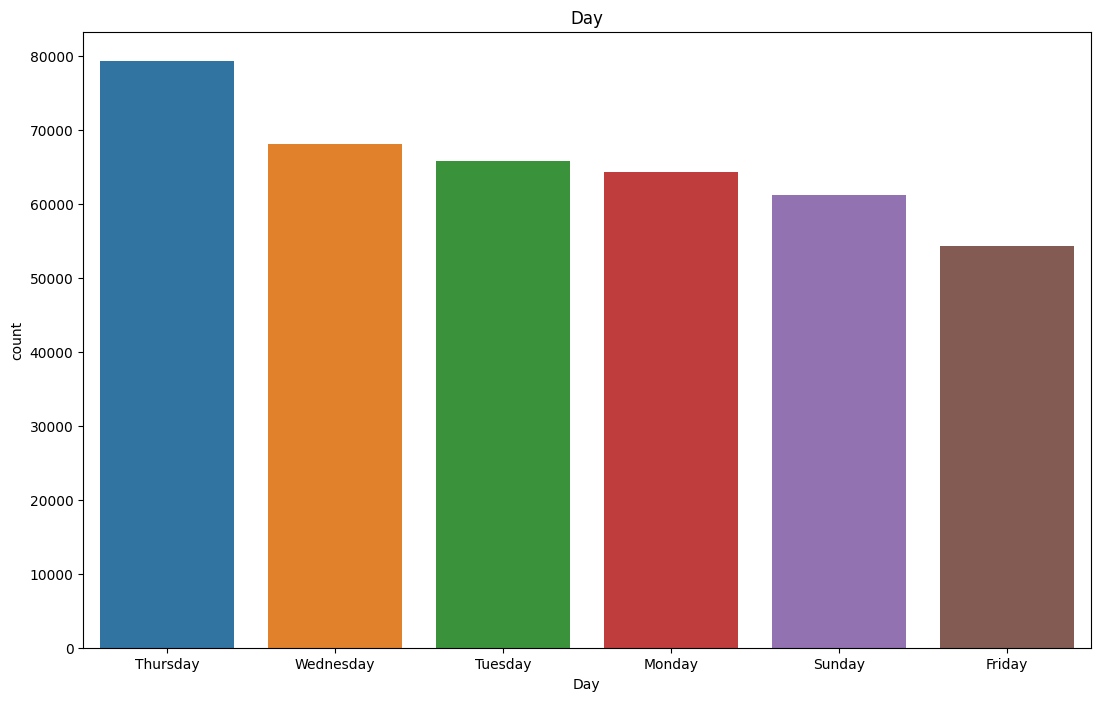

In [105]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day',y='count',data=day_df)

Most of the customers have purches the items in Thursday ,Wednesday and Tuesday

In [106]:
# check months counts
month_df=df['InvoiceDate_month'].value_counts().reset_index()
month_df


InvoiceDate_month  count
0                  11  63182
1                  10  48796
2                  12  42699
3                   9  39671
4                   5  28075
5                   6  26926
6                   3  26872
7                   8  26796
8                   7  26582
9                   4  22435
10                  1  20991
11                  2  19707

<Axes: title={'center': 'Month'}, xlabel='InvoiceDate_month', ylabel='count'>

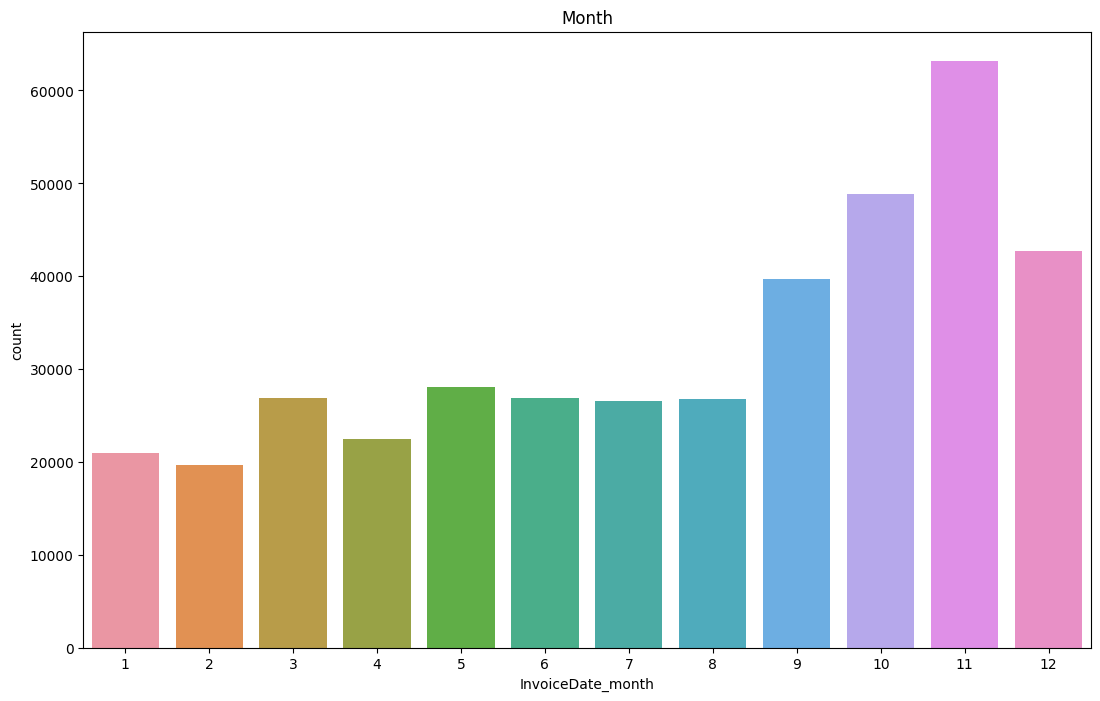

In [109]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='InvoiceDate_month',y='count',data=month_df)

** we can see last months having most sales,
less numbers of customers have purches the gifts in the month of April ,january and February **

In [110]:
# check hours of sales
hour_df=df['InvoiceDate_hour'].value_counts().reset_index()
hour_df

InvoiceDate_hour  count
0                 12  70942
1                 13  63024
2                 14  53260
3                 11  48373
4                 15  44793
5                 10  37775
6                 16  23719
7                  9  21928
8                 17  12942
9                  8   8688
10                19   3234
11                18   2896
12                20    778
13                 7    379
14                 6      1

<Axes: title={'center': 'Hour'}, xlabel='InvoiceDate_hour', ylabel='count'>

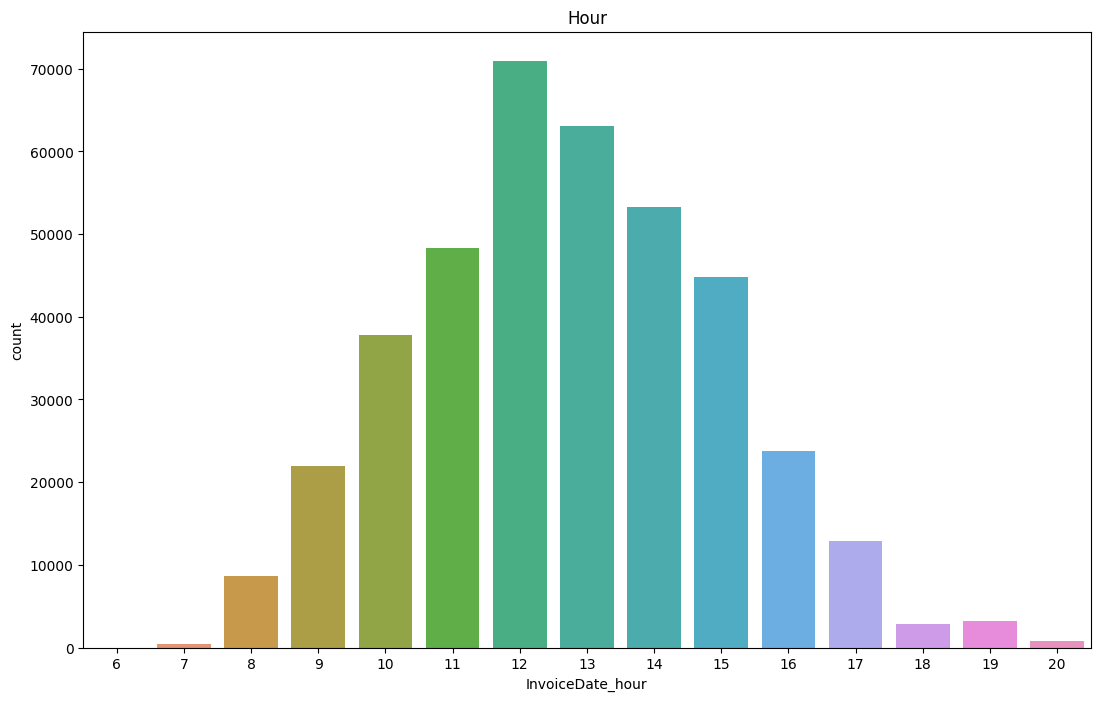

In [111]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='InvoiceDate_hour',y='count',data=hour_df)

* **From this graph we can see that in AfterNone Time most of the customers have purches the item.**

In [114]:
# appaly a function map hours into morning,Evening,Afternoon

def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'
  
df['Time_type']=df['InvoiceDate_hour'].apply(time_type)

<Axes: title={'center': 'Time_type'}, xlabel='Time_type', ylabel='count'>

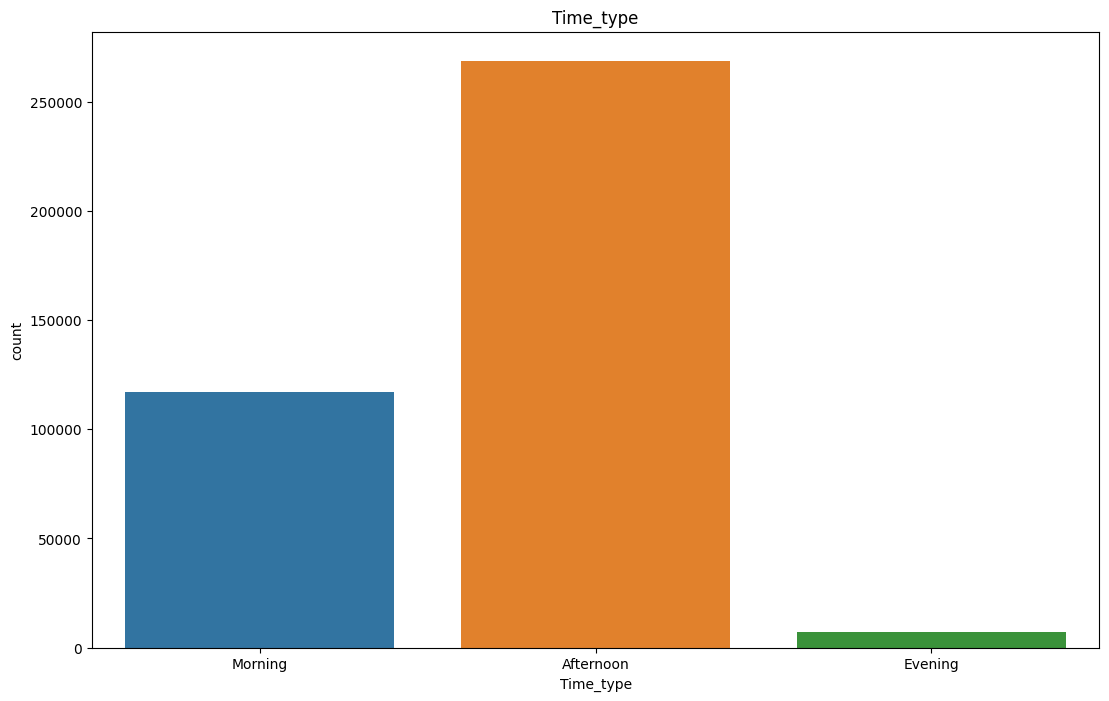

In [115]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

* **Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening**

# Creating RFM Model 

RFM (Recency, Frequency, and Monetary) is a customer segmentation technique used in marketing to categorize customers based on their past behavior. Recency measures how recently a customer made a purchase, Frequency tracks how often they make purchases, and Monetary assesses how much money they spend. By scoring customers on these three factors, businesses can identify high-value customers, potential churn risks, and opportunities for targeted marketing or re-engagement. RFM analysis helps create personalized strategies, such as sending promotions to frequent but low-spending customers or offering retention campaigns to those who haven't interacted in a while, ultimately enhancing customer satisfaction and driving better sales outcomes.

In [117]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [118]:
# discribe
rfm_df.describe()

Recency    Frequency       Monetary
count  4339.000000  4339.000000    4339.000000
mean     92.041484    90.512100    2048.215924
std     100.007757   225.515328    8984.248352
min       0.000000     1.000000       0.000000
25%      17.000000    17.000000     306.455000
50%      50.000000    41.000000     668.560000
75%     141.500000    98.000000    1660.315000
max     373.000000  7676.000000  280206.020000

In [119]:
# check distribution of each terms

<Axes: xlabel='Recency', ylabel='Density'>

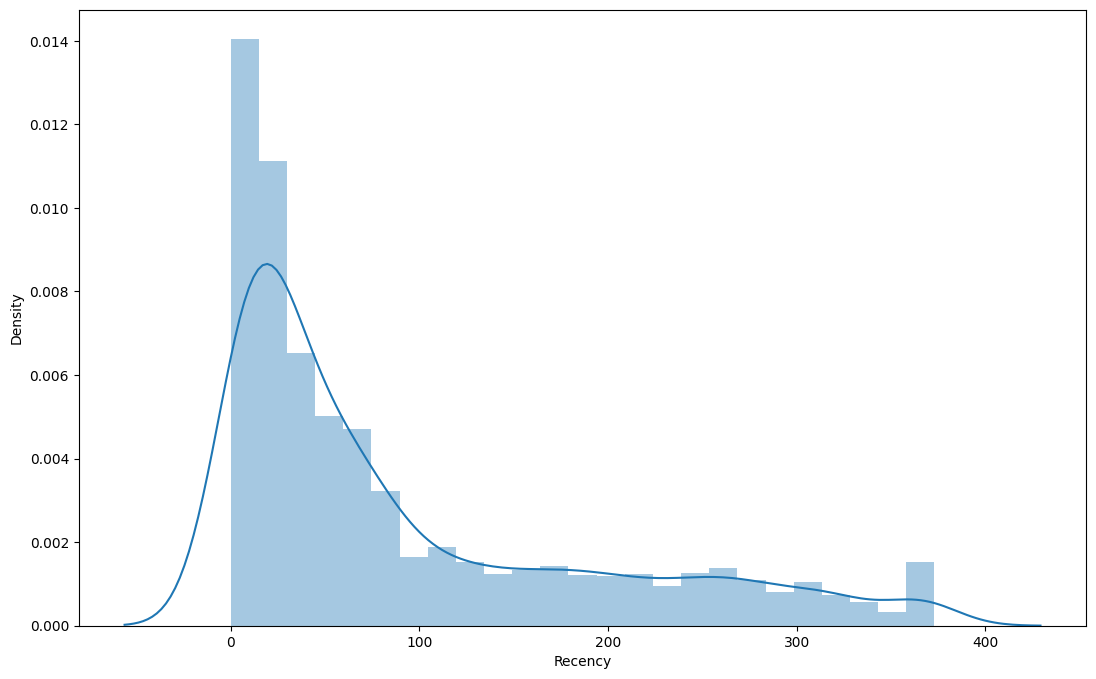

In [123]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

<Axes: xlabel='Frequency', ylabel='Density'>

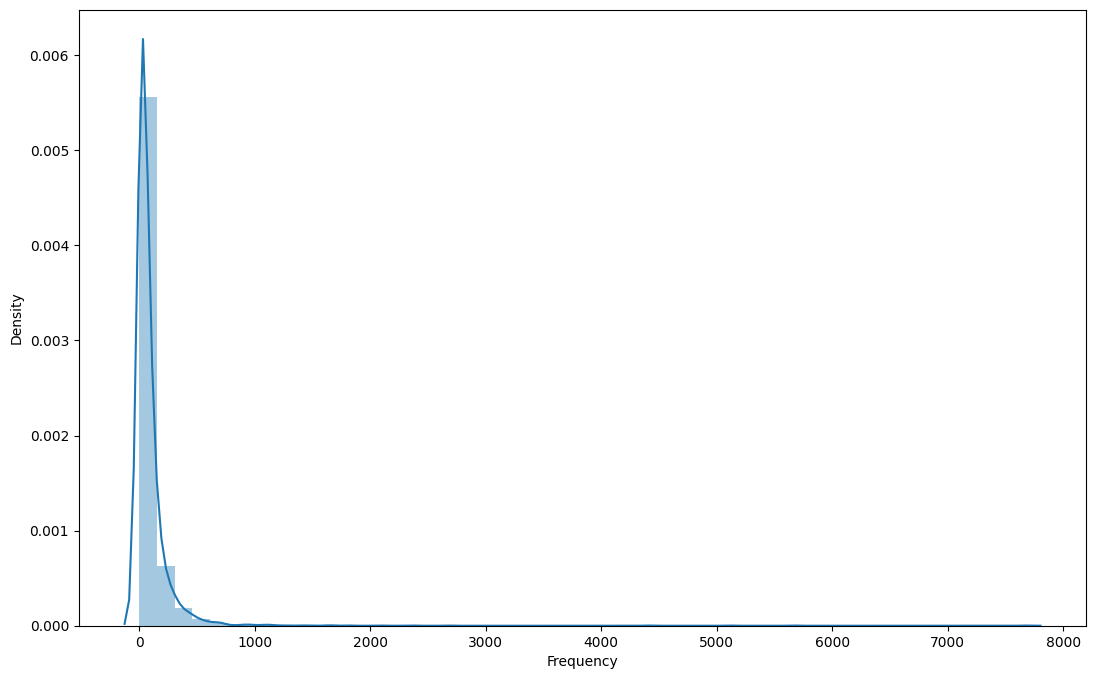

In [121]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

<Axes: xlabel='Monetary', ylabel='Density'>

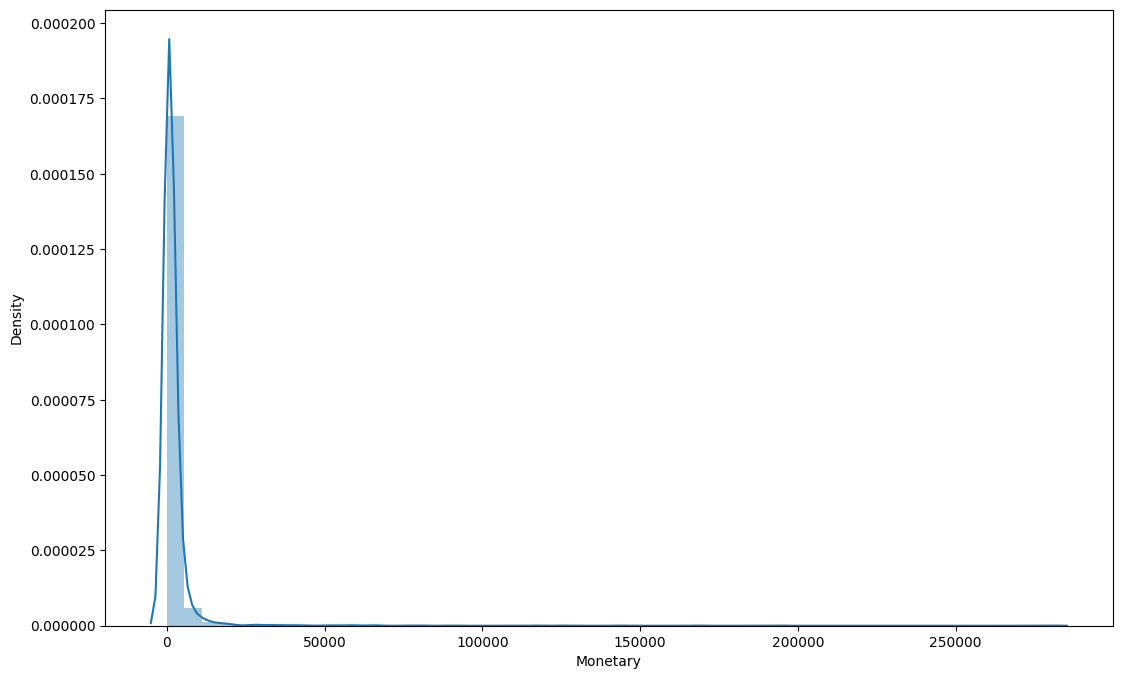

In [122]:
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [125]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [126]:
#Functions to create R, F and M segments
# recency shold be less, other shoud be high
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [127]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

RScoring Function: This function assigns a score based on the Recency (how recently a customer made a purchase). Recency is scored in reverse, meaning that:

1 is assigned to customers with the most recent purchases (lowest recency values).
4 is assigned to customers who haven’t purchased in a long time (highest recency values).
The function uses the quantile values (25%, 50%, 75%) calculated earlier to divide the customers into 4 groups:

If a customer's recency is below the 25th percentile, they get a score of 1.
If the recency is between the 25th and 50th percentile, they get a score of 2.
If the recency is between the 50th and 75th percentile, they get a score of 3.
If the recency is above the 75th percentile, they get a score of 4 (meaning they haven’t purchased recently).



FnMScoring Function: This function is used for Frequency and Monetary scores. Here, the scoring is done in reverse:

1 is assigned to customers who are high-frequency and high-spending (top 25%).
4 is assigned to customers who are low-frequency and low-spending (bottom 25%).
This function assigns:

4 for customers who are at the bottom (lowest) 25% for Frequency or Monetary.
3 for customers who are between the 25th and 50th percentile.
2 for customers who are between the 50th and 75th percentile.
1 for customers who are in the top 25% (highest frequency or spending).

In [128]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11


A customer with an RFMGroup of "444" would likely be a high-value, loyal customer (recency, frequency, and monetary all in the top quartile).
A customer with an RFMGroup of "111" might indicate a customer at risk of churning (low recency, frequency, and spending).
Categorization: This concatenated format (e.g., "342", "111") makes it easier to categorize customers based on their RFM behavior, which is helpful for targeting specific marketing campaigns.


Simplified Numerical Indicator: By adding the RFM scores, the RFMScore provides a single numerical value that represents the overall engagement and value of a customer. Higher scores indicate customers who are more engaged, frequent, and spend more.


In [129]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

Log Transformation Purpose:
Normalization: Log transformations are applied to make the data more normally distributed. Many machine learning algorithms (especially linear models) perform better when the data is normally distributed.
Reduce Skewness: For example, if the Monetary column has a few high outliers (like a customer spending a large sum of money), taking the log can reduce the influence of those outliers and make the distribution more uniform.
Compressing Data: It helps compress large values into a smaller range, making it easier to visualize and interpret.

for log negative value show error that will manage

<Axes: xlabel='Recency', ylabel='Density'>

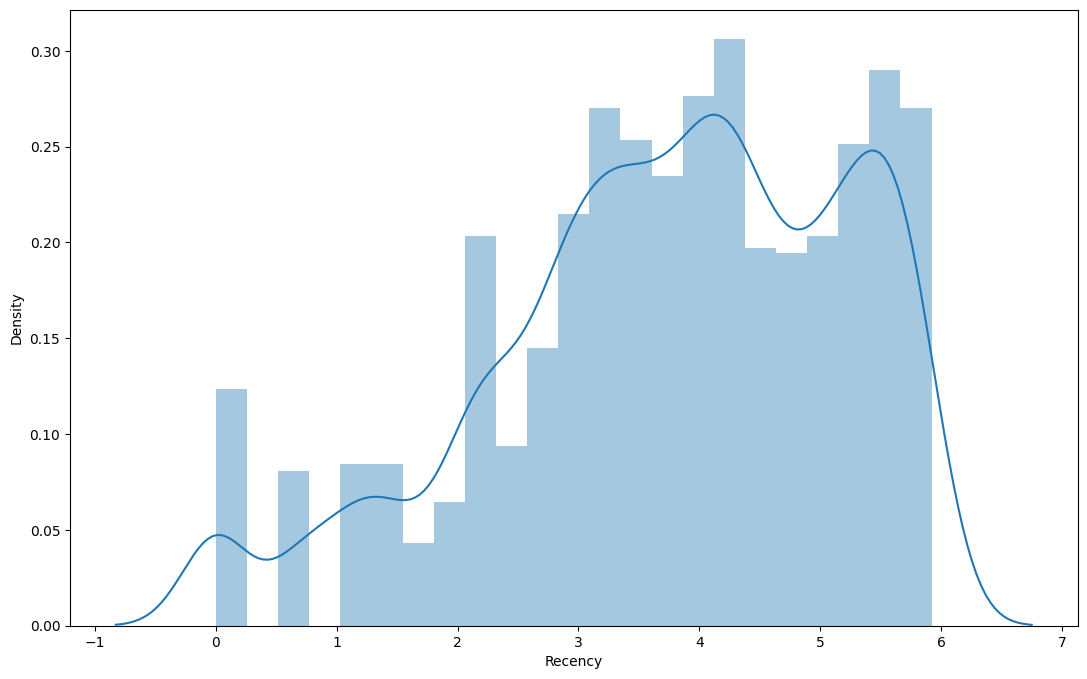

In [130]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

<Axes: xlabel='Frequency', ylabel='Density'>

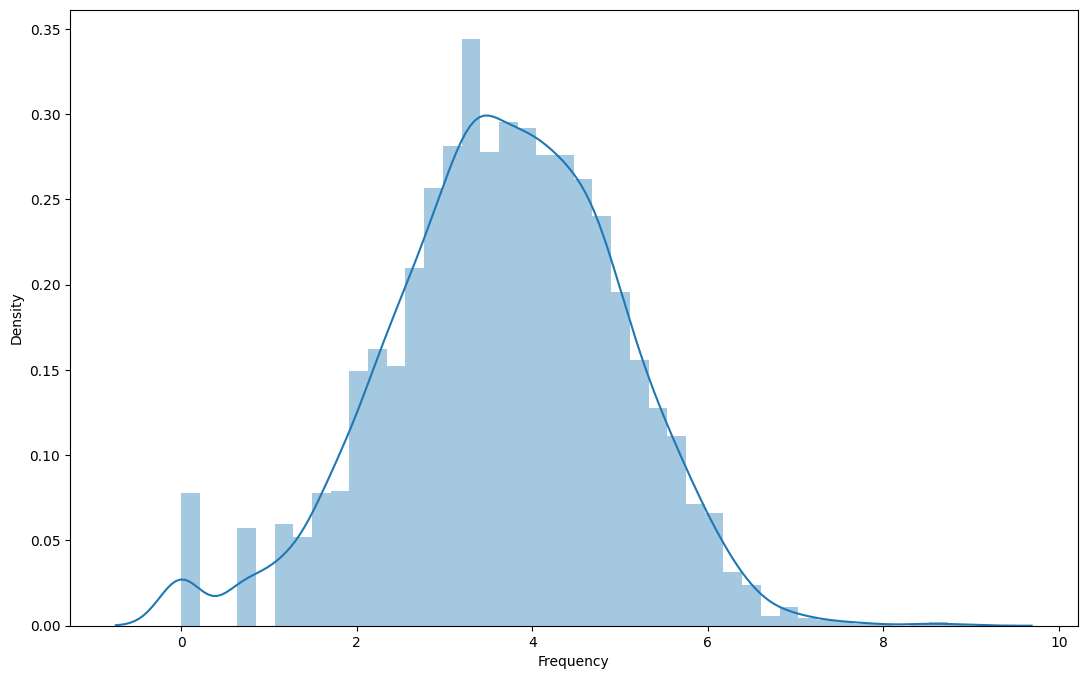

In [131]:

#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

<Axes: xlabel='Monetary', ylabel='Density'>

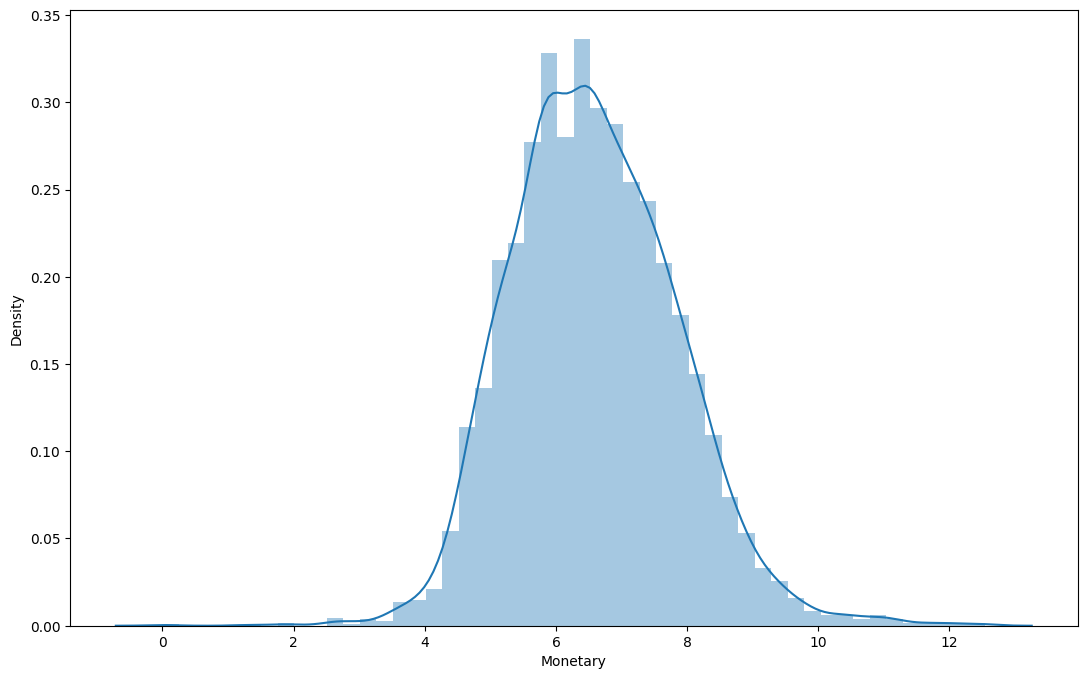

In [132]:
#Data distribution after data normalization for Monetary
# query to filter row whith condtion.to remove outlayers value after applay log
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [135]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [136]:
rfm_df

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
...             ...        ...       ... .. .. ..      ...       ...   
18280.0         277         10    180.60  4  4  4      444        12   
18281.0         180          7     80.82  4  4  4      444        12   
18282.0           7         12    178.05  1  4  4      144         9   
18283.0           3        721   2045.53  1  1  1      111         3   
18287.0          42         70   1837.28  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  
CustomerID                                            
12346.0        5.783825       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.890372       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338  
...                 ...            ...           ...  
18280.0        5.624018       2.302585      5.196285  
18281.0        5.192957       1.945910      4.392224  
18282.0        1.945910       2.484907      5.182064  
18283.0        1.098612       6.580639      7.623412  
18287.0        3.737670       4.248495      7.516041  

[4339 rows x 11 columns]

# Apply clustering models

# K-Means Clustering

***Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.***


***Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster***.

***The way kmeans algorithm works is as follows:***

1. ***Specify number of clusters K.***

2. ***Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.***

3. .***Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.***

4. .***Compute the sum of the squared distance between data points and all centroids..***

5. .***Assign each data point to the closest cluster (centroid)..***

6. .***Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster..***

.***The approach kmeans follows to solve the problem is called Expectation-Maximization. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster..***

**Calculation of Silhouette score**

***Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:***

* *** Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.***
*  ***Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b***.

 ***The Silhouette Coefficient for a sample is*** $ S = \frac{(b - a)}{max(a, b)}$.

# Apply K-Means with silhouette_score | RM |

In [137]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4208602845239211
For n_clusters = 3, silhouette score is 0.3453027206863318
For n_clusters = 4, silhouette score is 0.36465622088328054
For n_clusters = 5, silhouette score is 0.33689314886594035
For n_clusters = 6, silhouette score is 0.3441521655558375
For n_clusters = 7, silhouette score is 0.33244818769197315
For n_clusters = 8, silhouette score is 0.3391826175978501
For n_clusters = 9, silhouette score is 0.34326389010027225
For n_clusters = 10, silhouette score is 0.3459171613715103
For n_clusters = 11, silhouette score is 0.34708882895984955
For n_clusters = 12, silhouette score is 0.3364945568815216
For n_clusters = 13, silhouette score is 0.32750341591480303
For n_clusters = 14, silhouette score is 0.334086768617001
For n_clusters = 15, silhouette score is 0.3351512427872497


Based on the silhouette score results and clustering analysis using KMeans with Recency_log and Monetary_log features, the optimal clustering solution for this dataset is found with 2 clusters, as it achieves the highest silhouette score of 0.42. This suggests that the data is most effectively separated into two distinct clusters, offering the best balance of cohesion within clusters and separation between them. As the number of clusters increases, the silhouette scores either remain stable or slightly decrease, indicating that adding more clusters does not significantly improve the clustering quality.


In [141]:
# bulid model with kmeans=2
kmeans=KMeans(n_clusters=2)
pred=kmeans.fit_predict(rfm_df[['Recency_log','Monetary_log']])

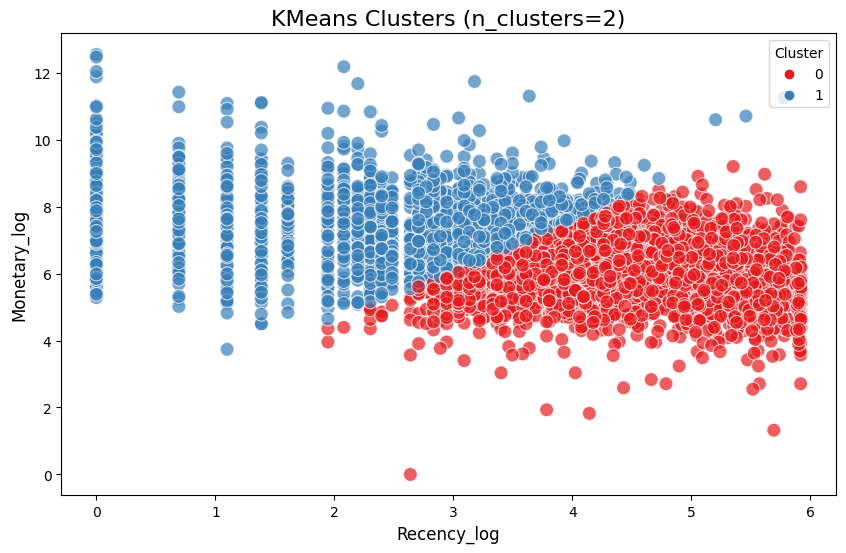

In [144]:
# ploting
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency_log', y='Monetary_log', hue=pred, palette='Set1', s=100, alpha=0.7)
plt.title('KMeans Clusters (n_clusters=2)', fontsize=16)
plt.xlabel('Recency_log', fontsize=12)
plt.ylabel('Monetary_log', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Apply K-Means with silhouette_score | FM |

In [140]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Frequency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47871615438533355
For n_clusters = 3, silhouette score is 0.40770991113651806
For n_clusters = 4, silhouette score is 0.3715380863123334
For n_clusters = 5, silhouette score is 0.3437322961764732
For n_clusters = 6, silhouette score is 0.3167036618969671
For n_clusters = 7, silhouette score is 0.3439299048852215
For n_clusters = 8, silhouette score is 0.31796381817196234
For n_clusters = 9, silhouette score is 0.33752962982452356
For n_clusters = 10, silhouette score is 0.32250303535052316
For n_clusters = 11, silhouette score is 0.3397069099285606
For n_clusters = 12, silhouette score is 0.34999708157357157
For n_clusters = 13, silhouette score is 0.3387290880542855
For n_clusters = 14, silhouette score is 0.3483105698648761
For n_clusters = 15, silhouette score is 0.3456240216654458


Based on the silhouette scores for different values of n_clusters, the best clustering result is achieved with 2 clusters, as it has the highest silhouette score of 0.4787. The dataset, which includes the columns 'Frequency_log' and 'Monetary_log', shows that as the number of clusters increases, the silhouette score decreases, suggesting that more clusters might lead to overfitting or unnecessary complexity. Although there is a slight increase in the score at 7 clusters (0.3439) and 12 clusters (0.3500), these improvements are marginal. Therefore, clustering the data into two clusters provides the best balance between cohesion and separation, making it the most effective number of clusters for this dataset.

In [145]:
# bulid model with kmeans=2
kmeans=KMeans(n_clusters=2)
pred=kmeans.fit_predict(rfm_df[['Frequency_log','Monetary_log']])

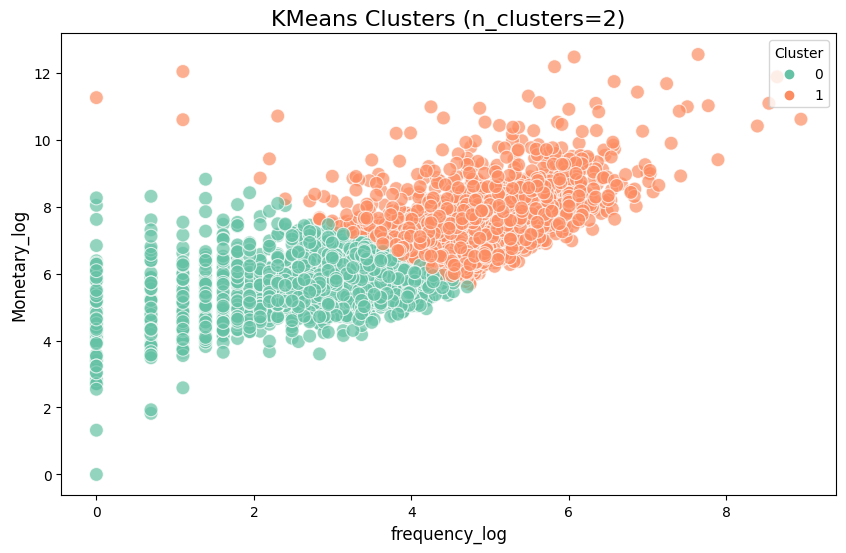

In [147]:
# ploting
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Frequency_log', y='Monetary_log', hue=pred, palette='Set2', s=100, alpha=0.7)
plt.title('KMeans Clusters (n_clusters=2)', fontsize=16)
plt.xlabel('frequency_log', fontsize=12)
plt.ylabel('Monetary_log', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Applay K-Means with silhouette_score | RFM |

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Frequency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [3,2,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.30562688852436193
For n_clusters = 2, silhouette score is 0.39504777817327397
For n_clusters = 4, silhouette score is 0.2990136935168096
For n_clusters = 5, silhouette score is 0.2755192935934511
For n_clusters = 6, silhouette score is 0.2790005432825232
For n_clusters = 7, silhouette score is 0.2631416377526541
For n_clusters = 8, silhouette score is 0.2669561892111629
For n_clusters = 9, silhouette score is 0.25570805135075547
For n_clusters = 10, silhouette score is 0.25972704864907076
For n_clusters = 11, silhouette score is 0.2490268555254762
For n_clusters = 12, silhouette score is 0.2624336682681791
For n_clusters = 13, silhouette score is 0.2560306455988564
For n_clusters = 14, silhouette score is 0.26008236895289205
For n_clusters = 15, silhouette score is 0.2610781253614845


In [160]:
# bulid model with kmeans=2
kmeans=KMeans(n_clusters=2)
pred=kmeans.fit_predict(rfm_df[['Recency_log','Frequency_log','Monetary_log']])

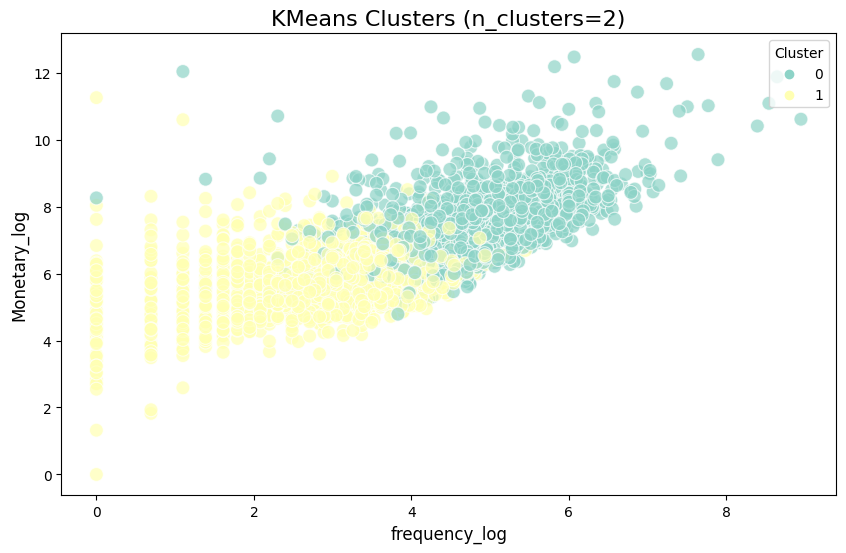

In [161]:
# ploting
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Frequency_log', y='Monetary_log', hue=pred, palette='Set3', s=100, alpha=0.7)
plt.title('KMeans Clusters (n_clusters=2)', fontsize=16)
plt.xlabel('frequency_log', fontsize=12)
plt.ylabel('Monetary_log', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()


## **Applying elbow method**


**Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. Let us see how this elbow method works. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance***.

***When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square value will decrease***.

***Finally, we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k***.

# Apply K-Means with Elbow methos | RM | 

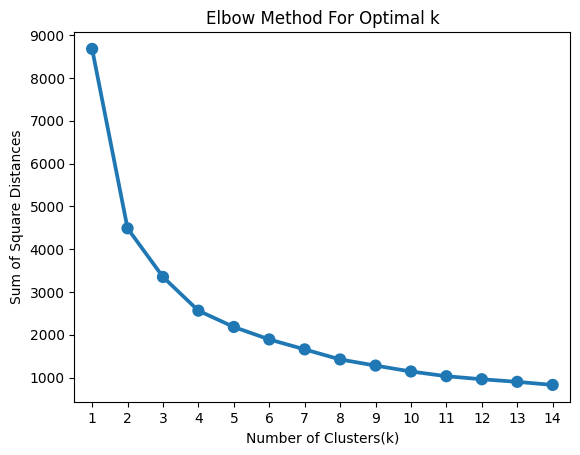

In [153]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [162]:
# bulid model with kmeans=2
kmeans=KMeans(n_clusters=2)
pred=kmeans.fit_predict(rfm_df[['Recency_log','Monetary_log']])

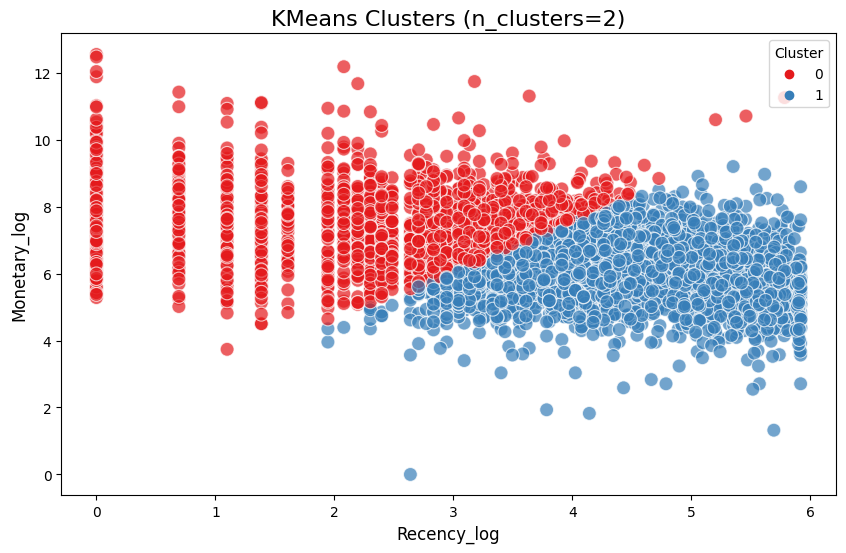

In [163]:
# ploting
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency_log', y='Monetary_log', hue=pred, palette='Set1', s=100, alpha=0.7)
plt.title('KMeans Clusters (n_clusters=2)', fontsize=16)
plt.xlabel('Recency_log', fontsize=12)
plt.ylabel('Monetary_log', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Apply  K-Means with Elbow methos | FM |

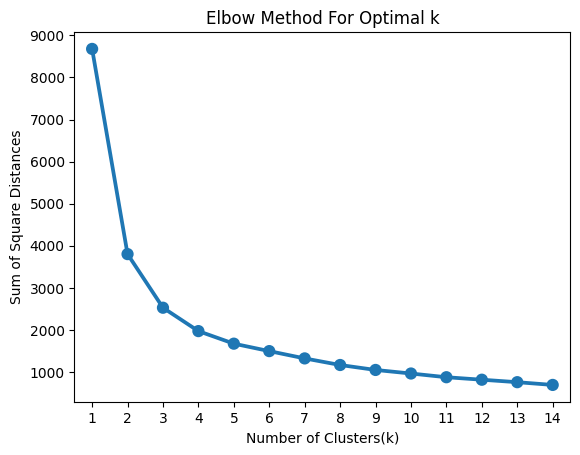

In [165]:
features_rec_mon=['Frequency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [166]:
# bulid model with kmeans=2
kmeans=KMeans(n_clusters=2)
pred=kmeans.fit_predict(rfm_df[['Frequency_log','Monetary_log']])

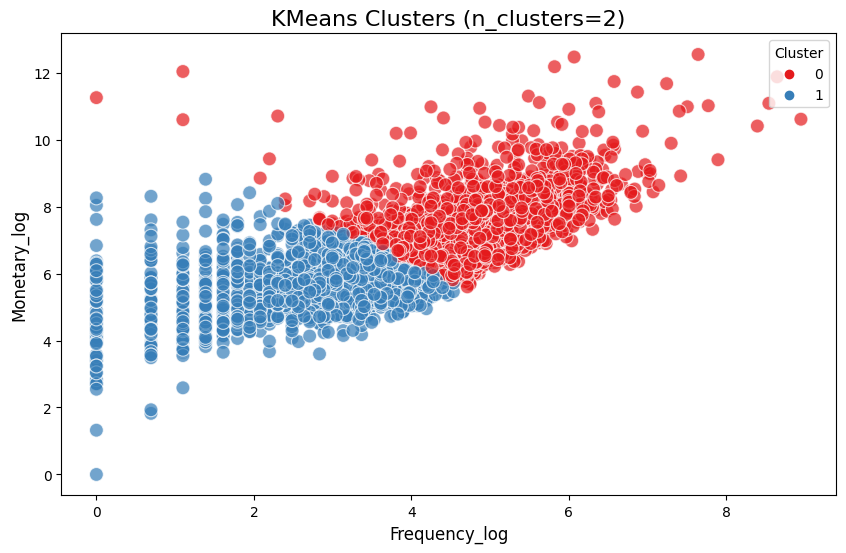

In [167]:
# ploting
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Frequency_log', y='Monetary_log', hue=pred, palette='Set1', s=100, alpha=0.7)
plt.title('KMeans Clusters (n_clusters=2)', fontsize=16)
plt.xlabel('Frequency_log', fontsize=12)
plt.ylabel('Monetary_log', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Apply K-Means with Elbow methos | RFM | 

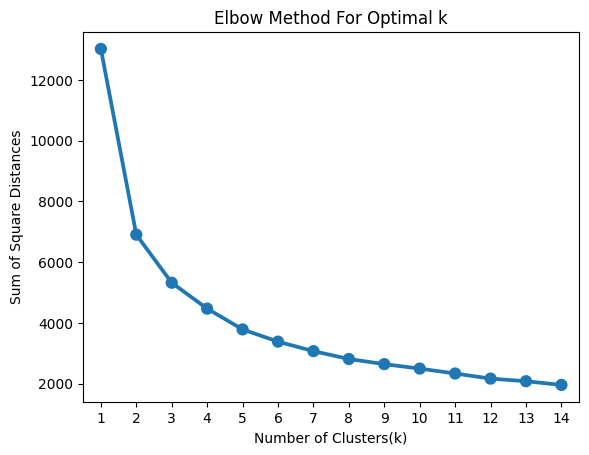

In [168]:
features_rec_mon=['Recency_log','Frequency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [169]:
# bulid model with kmeans=2
kmeans=KMeans(n_clusters=2)
pred=kmeans.fit_predict(rfm_df[['Recency_log','Frequency_log','Monetary_log']])

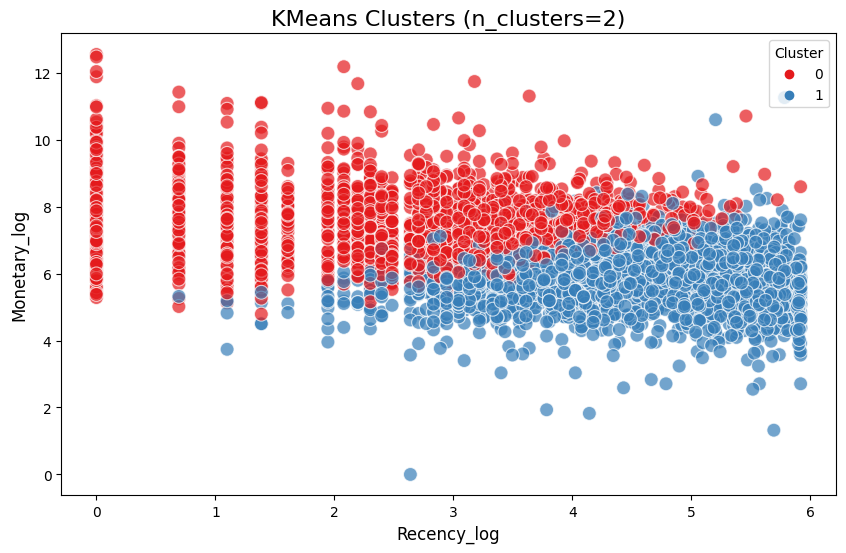

In [179]:
# ploting
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency_log', y='Monetary_log', hue=pred, palette='Set1', s=100, alpha=0.7)
plt.title('KMeans Clusters (n_clusters=2)', fontsize=16)
plt.xlabel('Recency_log', fontsize=12)
plt.ylabel('Monetary_log', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.39504777817327397
For n_clusters = 3 The average silhouette_score is : 0.3056346992700891
For n_clusters = 4 The average silhouette_score is : 0.25237477092646426
For n_clusters = 5 The average silhouette_score is : 0.28037139268225125
For n_clusters = 6 The average silhouette_score is : 0.27920490924462127
For n_clusters = 7 The average silhouette_score is : 0.268025513865533
For n_clusters = 8 The average silhouette_score is : 0.2618560246297713
For n_clusters = 9 The average silhouette_score is : 0.2549321593271788
For n_clusters = 10 The average silhouette_score is : 0.24885200573378316
For n_clusters = 11 The average silhouette_score is : 0.24511541407814633
For n_clusters = 12 The average silhouette_score is : 0.2528349599034246
For n_clusters = 13 The average silhouette_score is : 0.25726292880853724
For n_clusters = 14 The average silhouette_score is : 0.2555241043184731
For n_clusters = 15 The average silhouette_score is :

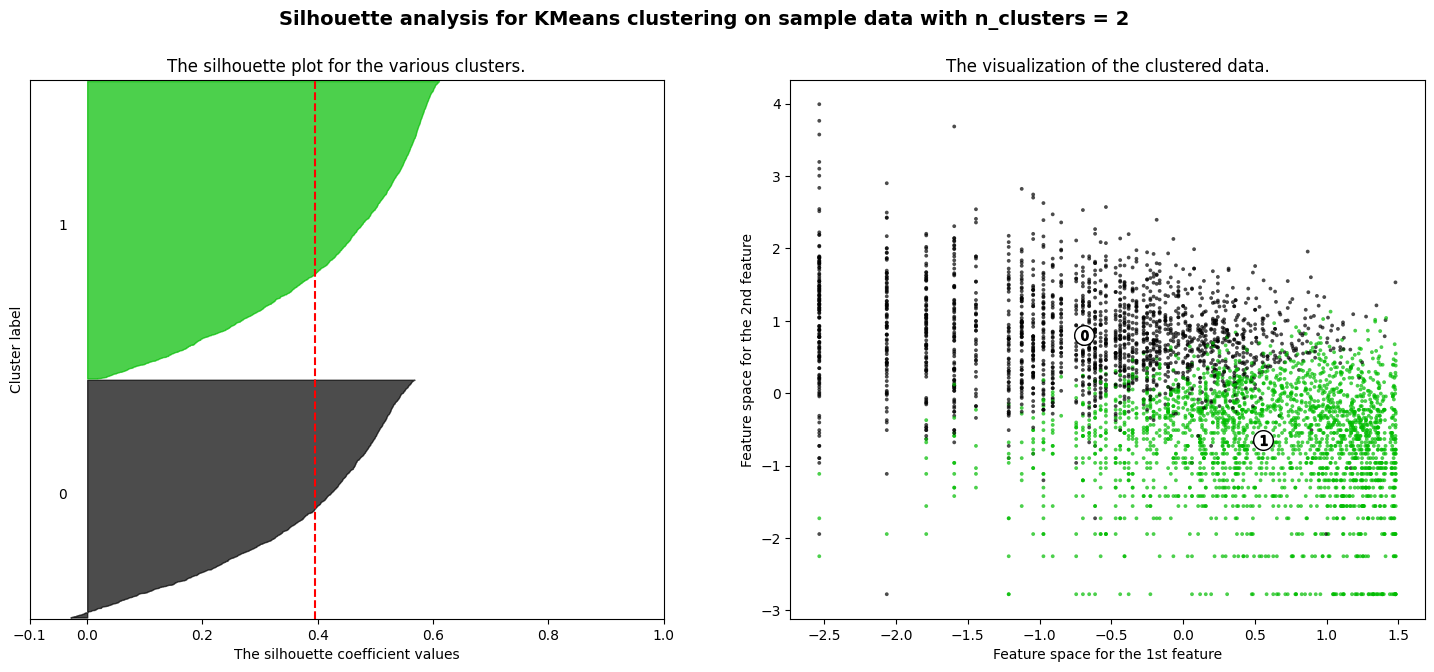

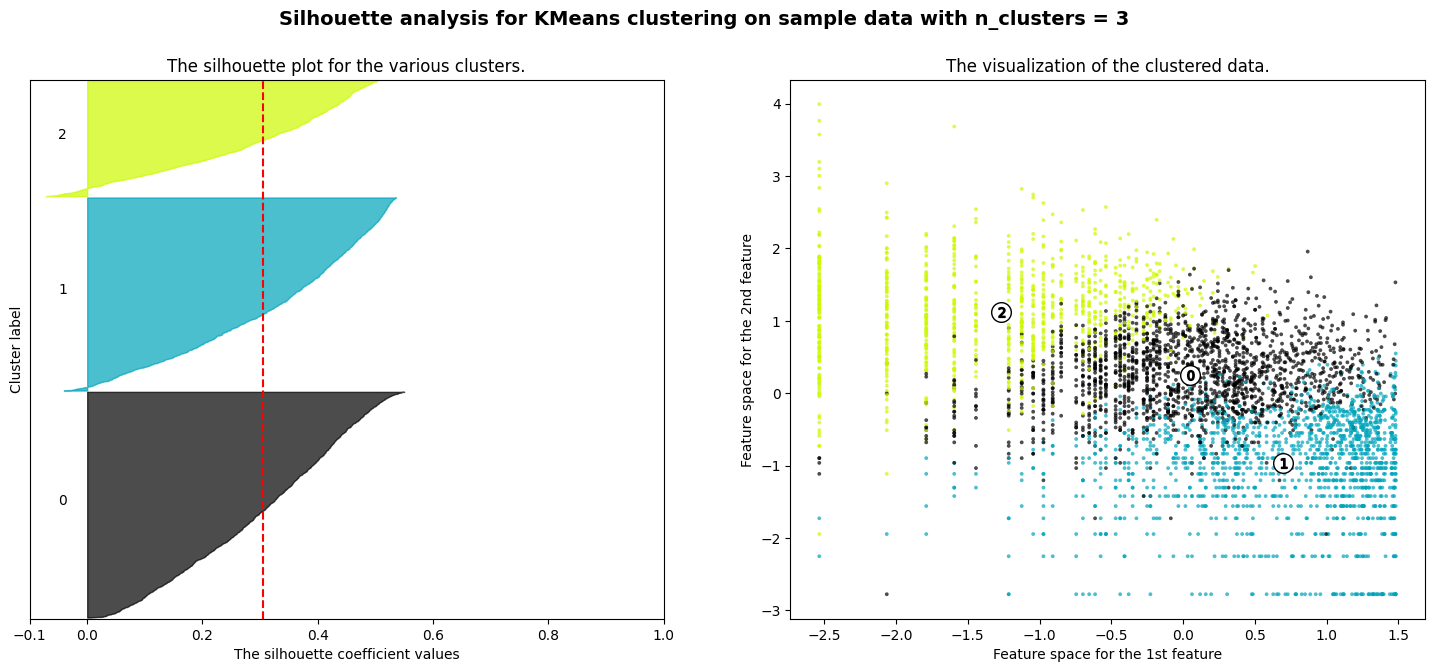

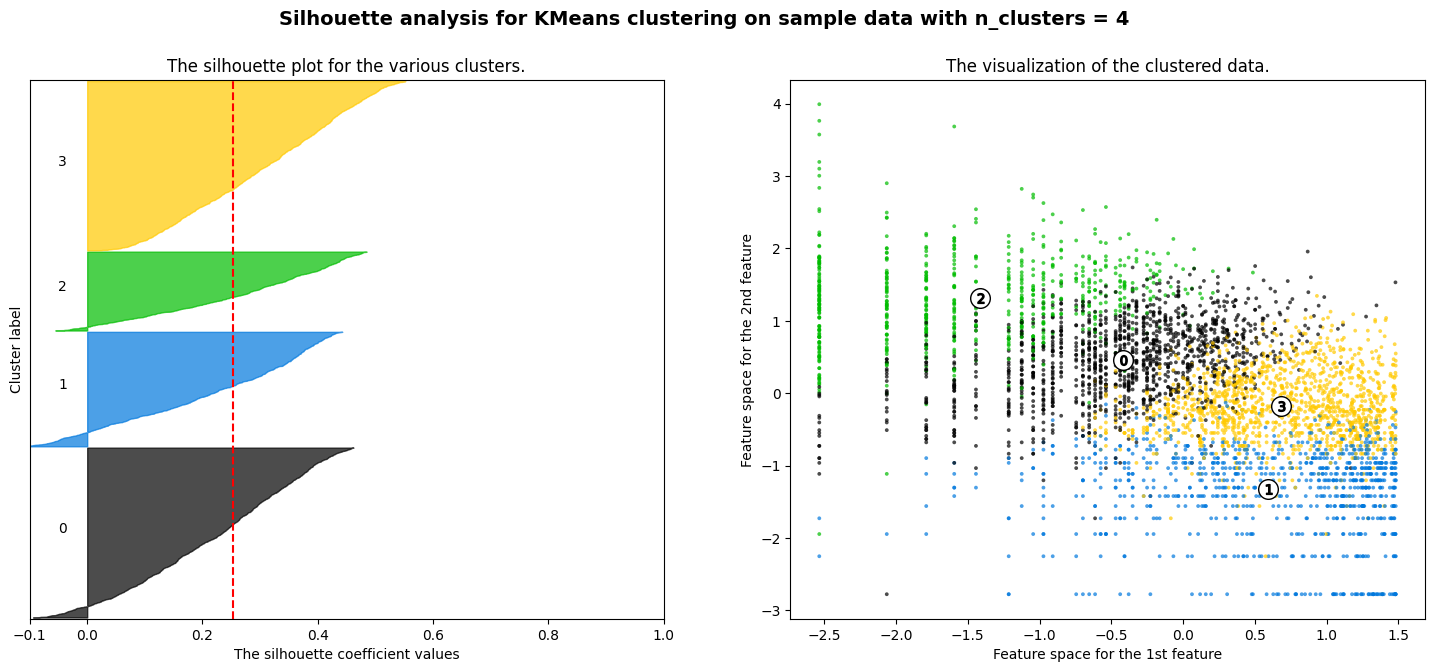

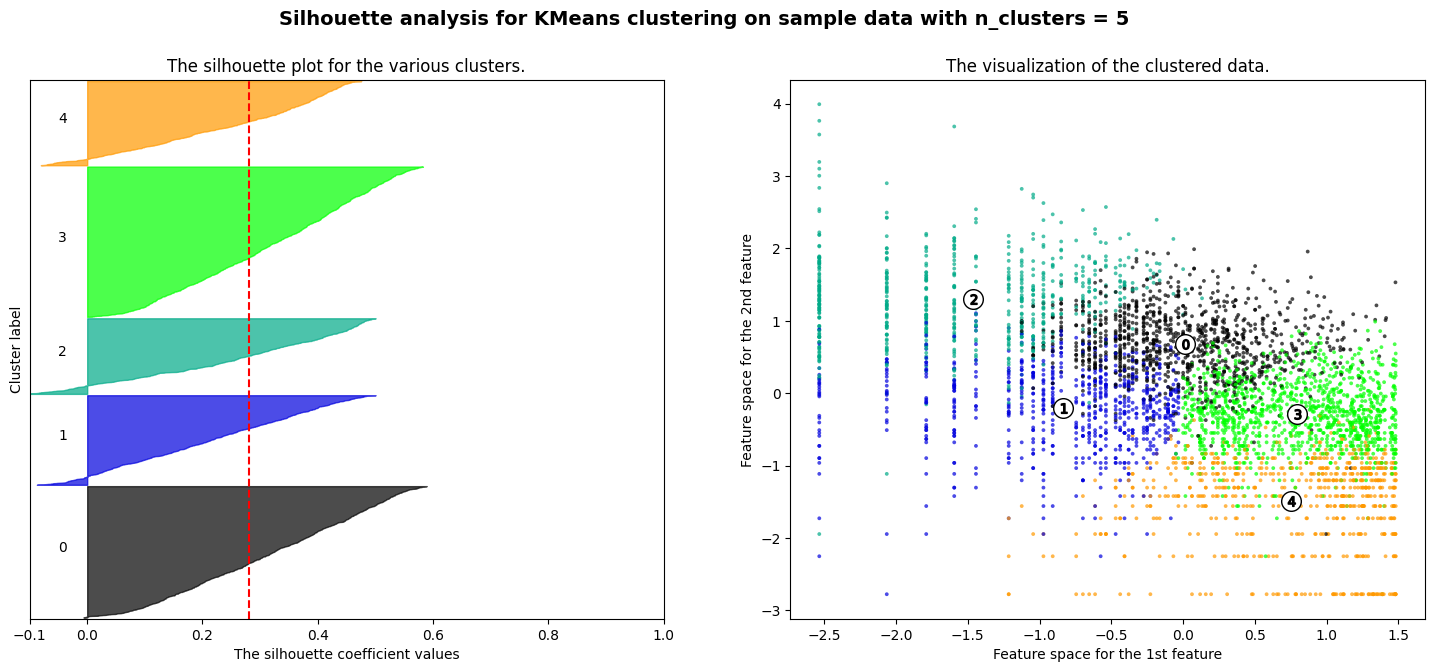

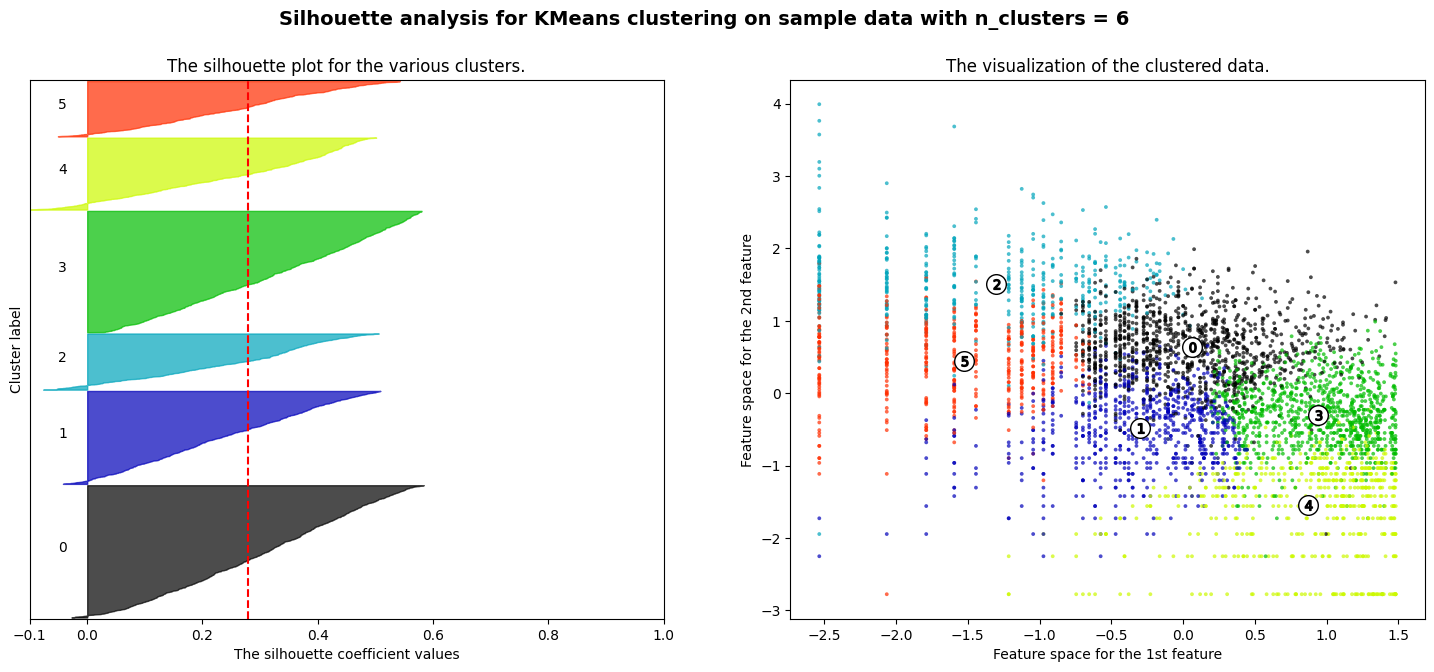

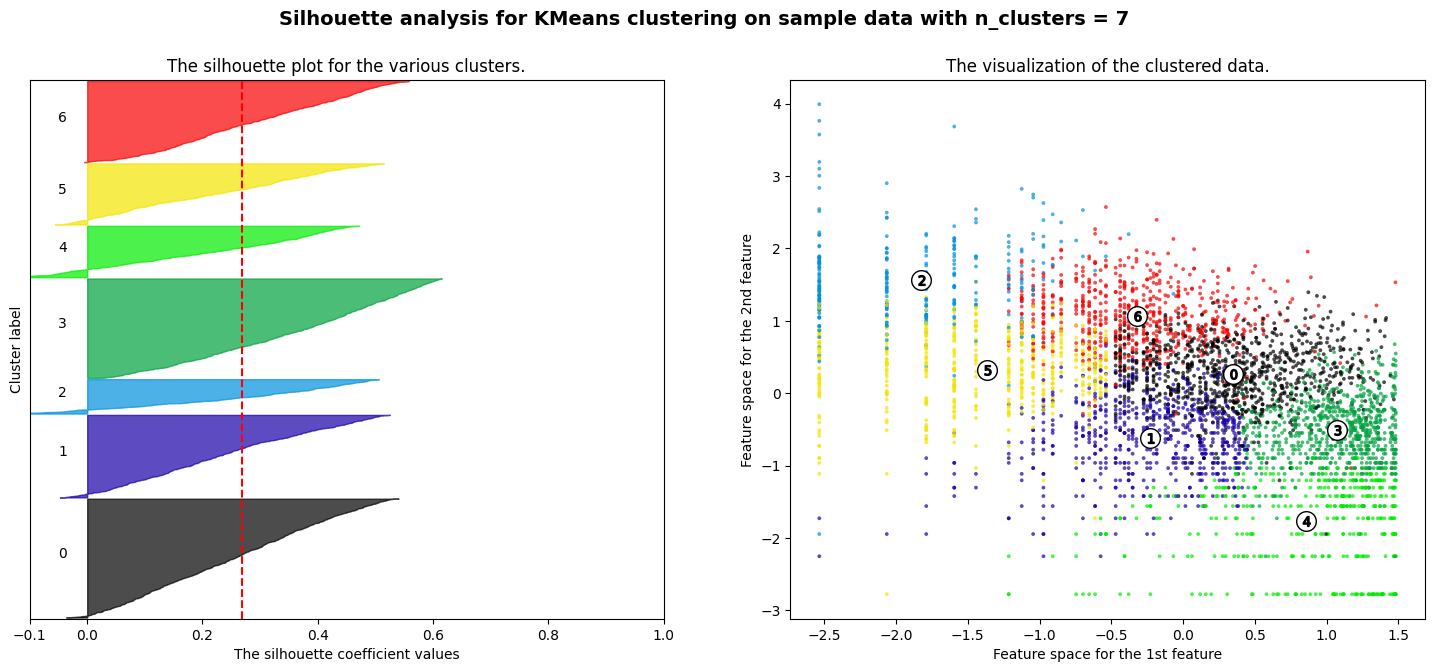

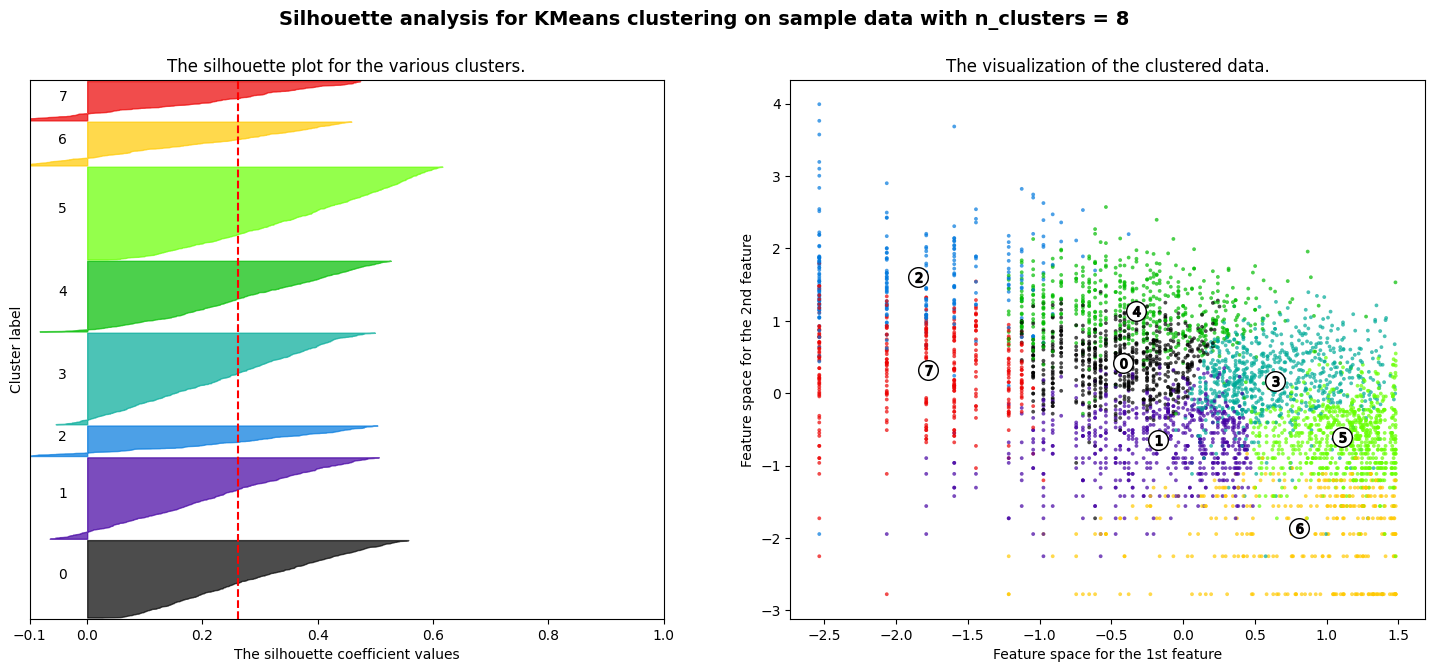

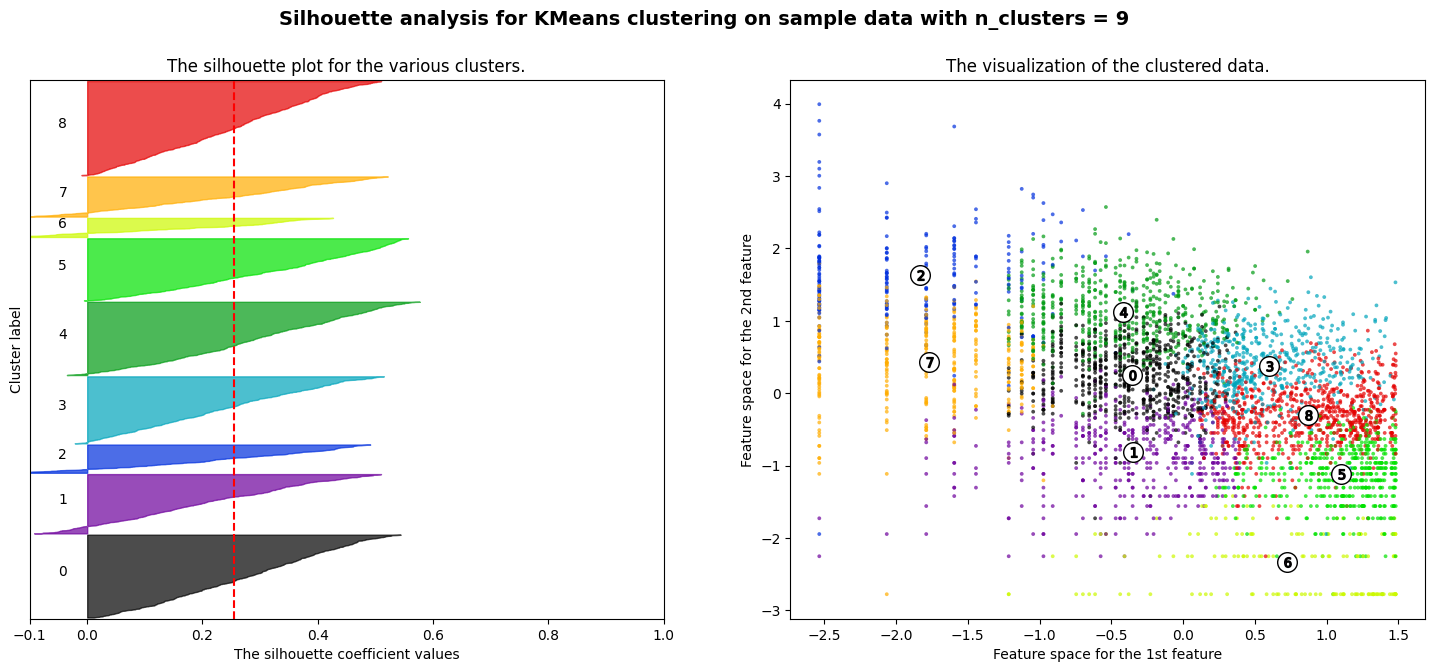

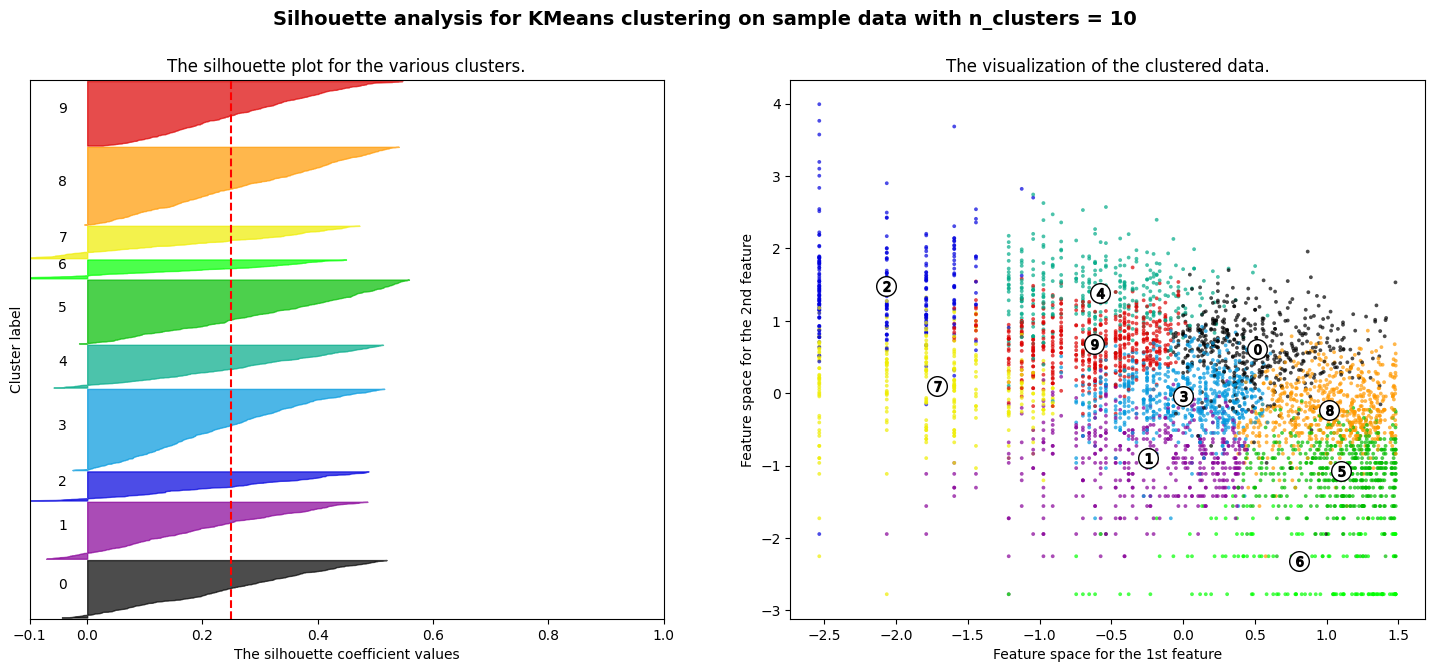

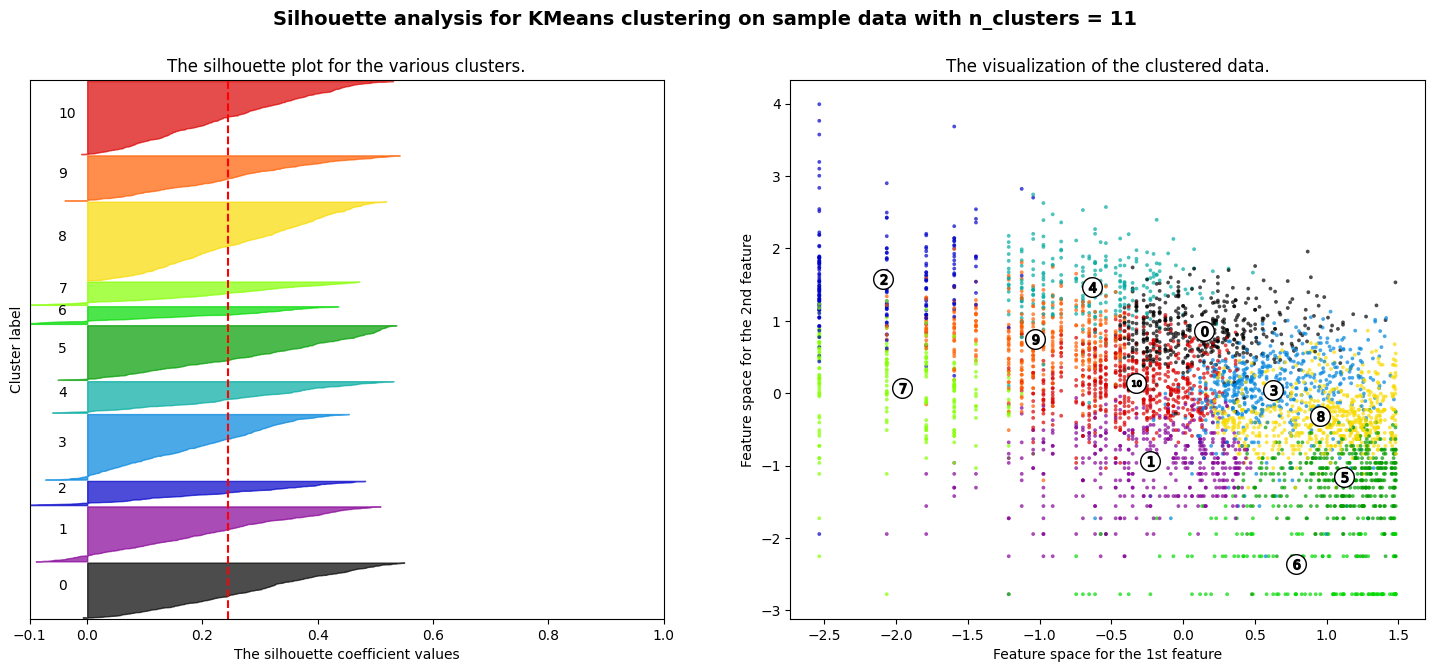

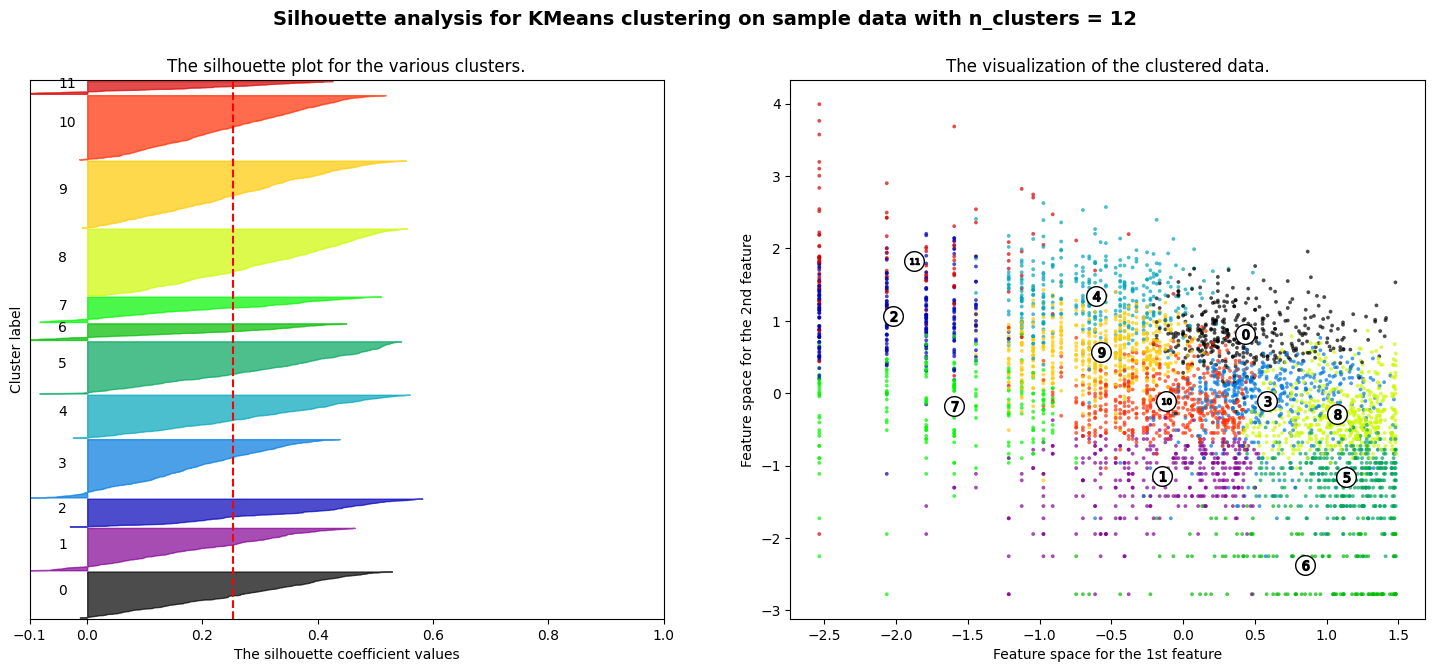

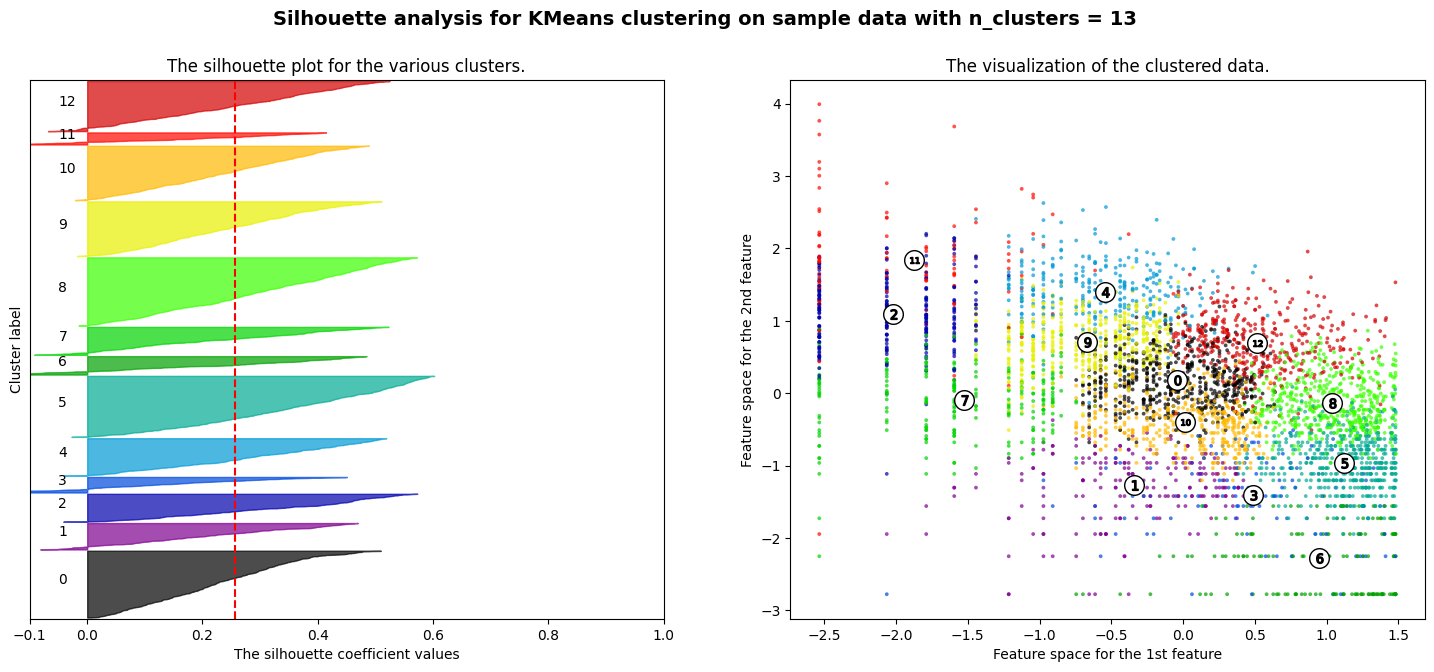

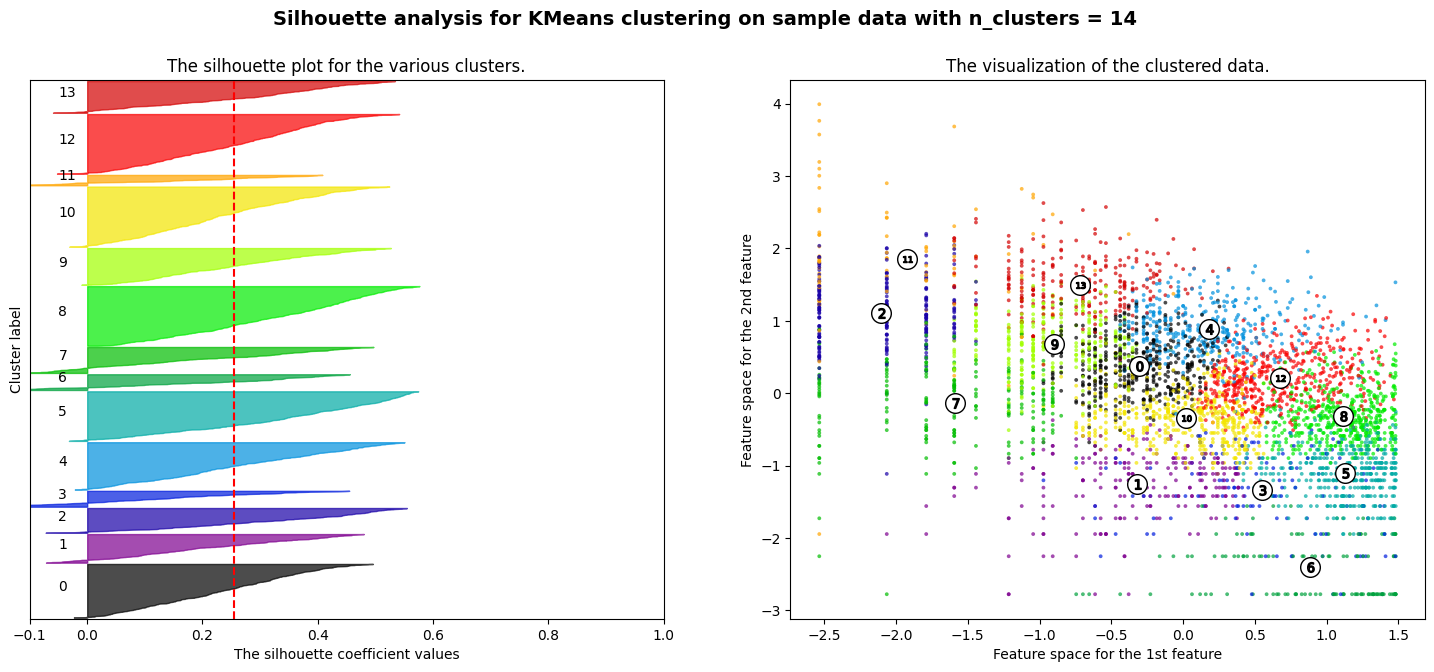

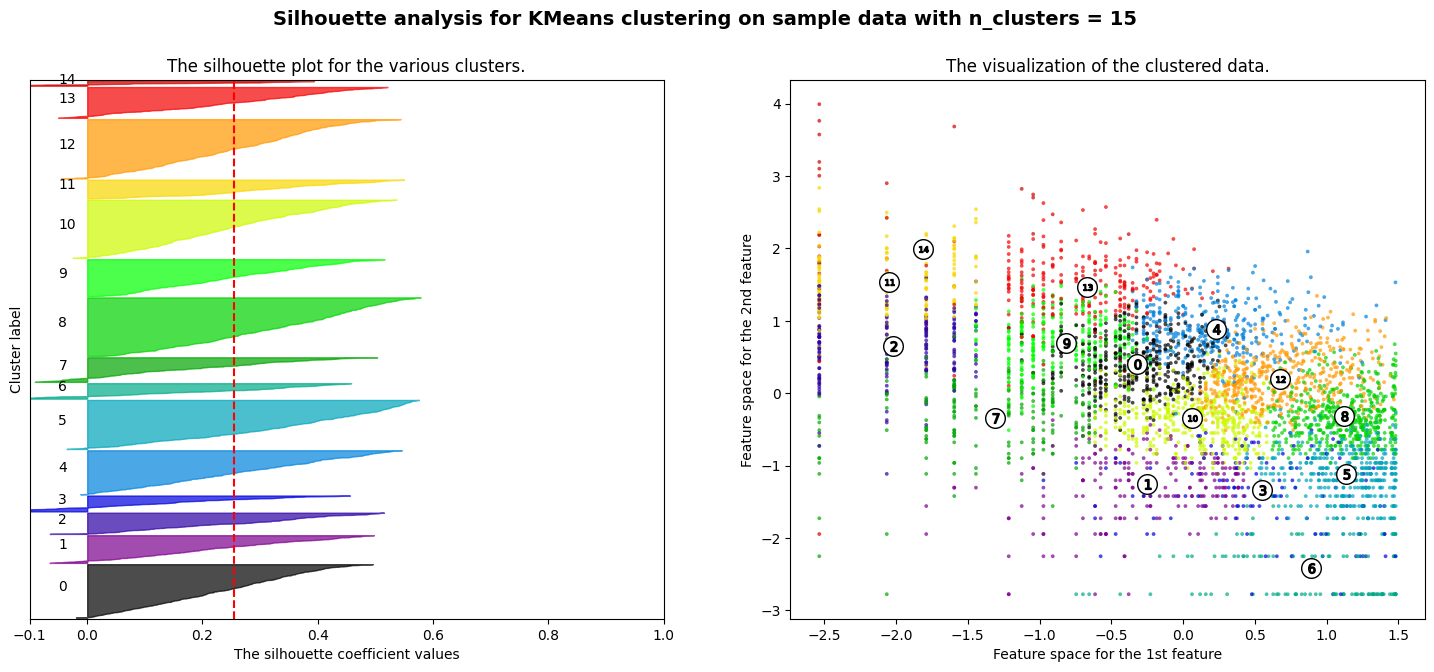

In [184]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# DBSCAN Clustering

***Clustering analysis or simply Clustering is basically an Unsupervised learning method that divides the data points into a number of specific batches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense. It comprises many different methods based on differential evolution.*** 
***E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance) etc*** 

***Fundamentally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on Density-based spatial clustering of applications with noise (DBSCAN) clustering method***

# Apply DBSCAN | RM |

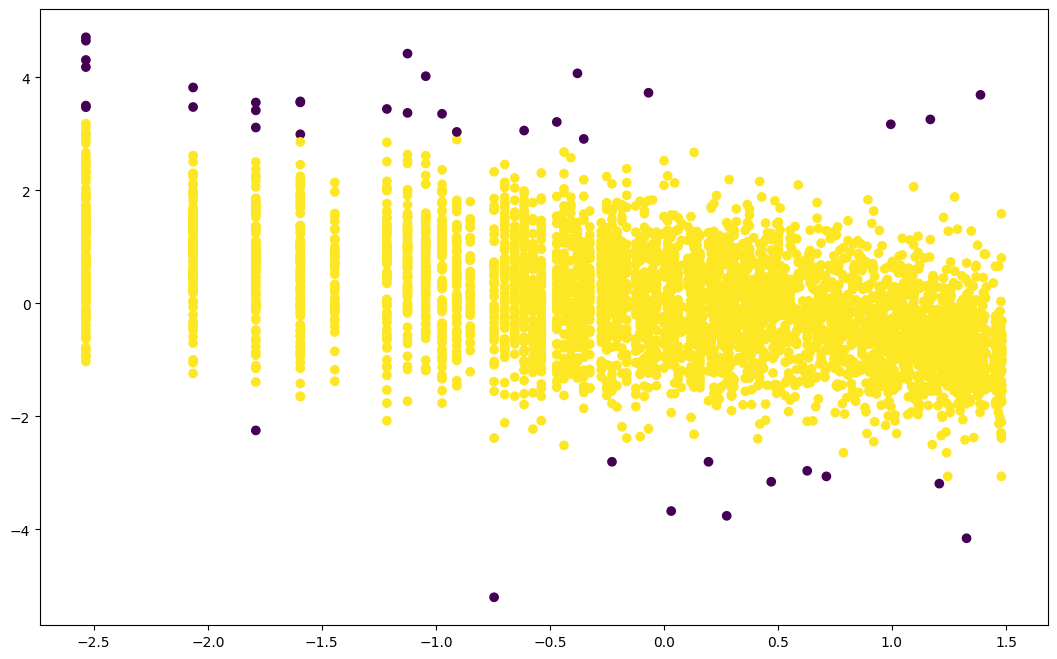

In [180]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Apply DBSCAN | FM | 

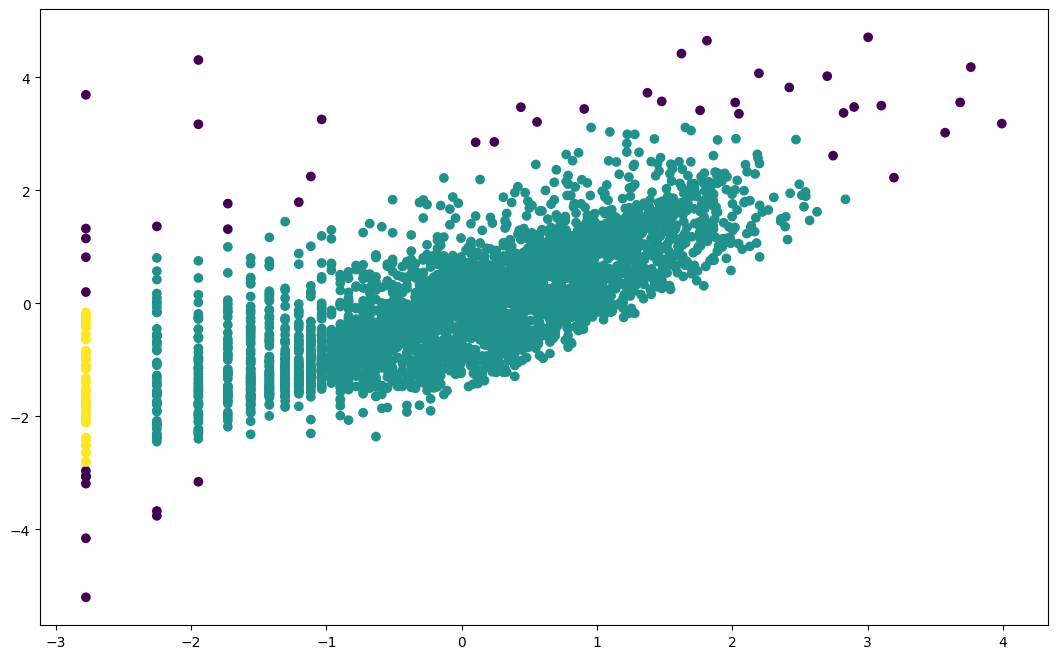

In [182]:
features_rec_mon=['Frequency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)


# apply DBSCAN | RFM | 

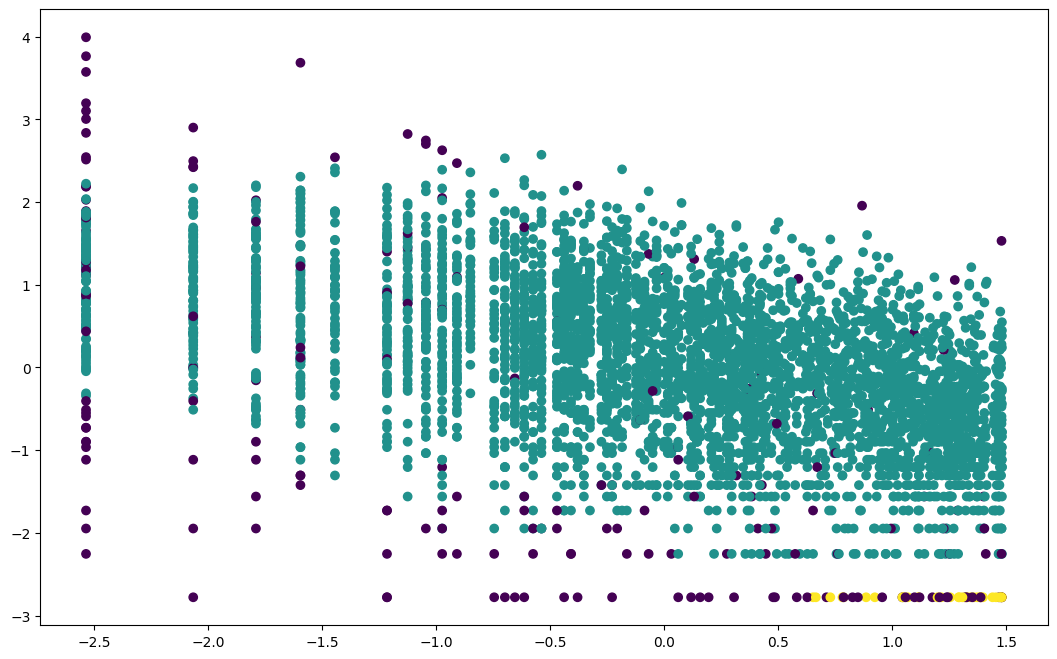

In [183]:
features_rec_mon=['Recency_log','Frequency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Apply Hierarchical clustering | RFM | | 

**Dendogram to find the optimal number of clusters**

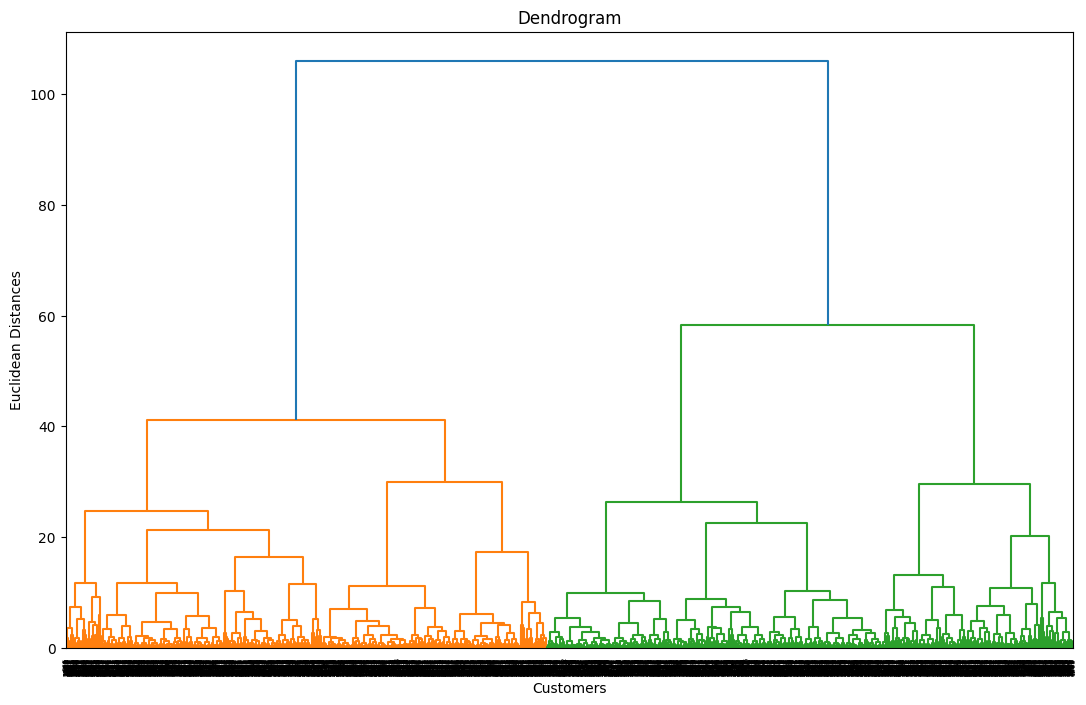

In [185]:
features_rec_mon=['Recency_log','Frequency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon



# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**

* **No. of Cluster = 2**

In [187]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
y_hc = hc.fit_predict(X)

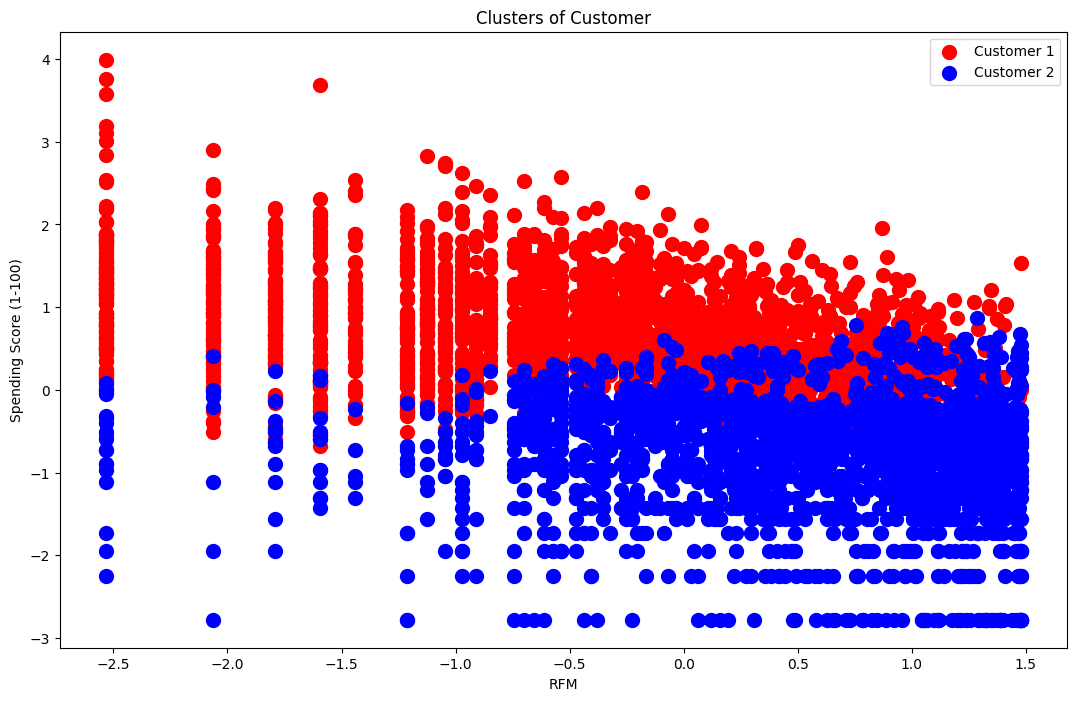

In [190]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [195]:

from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['6',"DBSCAN ", "FM", "3"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   6    |            DBSCAN              |  FM  |             3             |
|   10   |            DBSCAN              | RFM  |             3             |
|   9    |   Hierarchical clustering      | RFM  |  

# conclusion

The customer segmentation project utilizes clustering techniques such as K-Means, DBSCAN, and Hierarchical Clustering to segment customers based on various datasets (RM, FM, and RFM). The results indicate that K-Means consistently identifies 2 clusters as optimal for all datasets, suggesting a clear division in customer segments. While DBSCAN identifies 2 clusters for RM and 3 clusters for FM and RFM, it highlights the presence of more complex, density-based clusters in some datasets. Hierarchical Clustering also identifies 2 clusters for the RFM dataset, aligning with the results from K-Means. Overall, the segmentation demonstrates that two distinct customer groups are most apparent, allowing businesses to tailor strategies effectively. The results emphasize the utility of clustering methods in identifying key customer segments based on recency, frequency, and monetary values, which can be used to enhance customer targeting and engagement.